# Contents <a id='back'></a>

* [Task 2. What sells a car](#intro)
    * [2.1  Initialization](#initial)
        * [2.1.1  Load data](#load)
        * [2.1.2  Explore initial data](#explore)
        * [2.1.3  Conclusions and further steps](#further)
    * [2.2  Treat missing values (if any)](#treat_na)
        * [2.2.1  `paint_color`](#na_paint)
        * [2.2.2  `model_year`](#na_year)
        * [2.2.3  `cylinders`](#na_cylinder)
        * [2.2.4  `odometer`](#na_odometer)
    * [2.3 Fix data types](#type)
    * [2.4 Enrich data](#enrich)
    * [2.5 Check clean data](#clean)
    * [2.6 Study core parameters](#parameters)
        * [2.6.1 Study parameter `vehicle_age`](#para_age)
        * [2.6.2 Study parameter `price`](#para_price)
        * [2.6.3 Study parameter `avg_mileage`](#para_mileage)
        * [2.6.4 Study parameter `cylinders`](#para_cylinder)
        * [2.6.5 Study parameter `condition`](#para_condiiton)
    * [2.7 Study and treat outliers](#outliers)
        * [2.7.1 Study outliers for `odometer`](#outliers_odometer)
        * [2.7.2 Study outliers for `price`](#outliers_price)
        * [2.7.3 Study outliers for `avg_mileage`](#outliers_mileage)
    * [2.8 Study core parameters without outliers](#wo_outliers)
    * [2.9 Ads lifetime](#ads)
    * [2.10 Average price per each type of vehicle](#mean_price)
    * [2.11 Price factors](#price_factors)
        * [2.11.1 Price factors for only truck](#price_truck)
            * [2.11.1.1 Truck price factors `vehicle_age`](#truck_age)
            * [2.11.1.2 Truck price factors `model_year`](#truck_year)
            * [2.11.1.3 Truck price factors `odometer`](#truck_odometer)
            * [2.11.1.4 Truck price factors `transmission`](#truck_transmission)
            * [2.11.1.5 Truck price factors `condition`](#truck_condition)
            * [2.11.1.6 Truck price factors `paint_color`](#truck_paint)
        * [2.11.2 Price factors for only SUV](#price_suv)
            * [2.11.2.1 SUV price factors `vehicle_age`](#suv_age)
            * [2.11.2.2 SUV price factors `model_year`](#suv_year)
            * [2.11.2.3 SUV price factors `odometer`](#suv_odometer)
            * [2.11.2.4 SUV price factors `transmission`](#suv_transmission)
            * [2.11.2.5 SUV price factors `condition`](#suv_condition)
            * [2.11.2.6 SUV price factors `paint_color`](#suv_paint)
    * [2.12 General Conclusion](#conclusion)

# What sells a car? <a id='intro'></a>

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization <a id='initial'></a>

Import the pandas and matplotlib library 

In [210]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load data <a id='load'></a>

Load the project into `car` variable.

In [211]:
# Load the data file into a DataFrame
car = pd.read_csv('vehicles_us.csv')

### Explore initial data <a id='explore'></a>

In [212]:
# print the general/summary information about the DataFrame

car.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [213]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `type` — type of vehicle
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

Use `.head()`, `.info()`, `.shape` and `.describe()` to find general information of the data.

In [214]:
car.shape

(51525, 13)

In [215]:
car.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


- there are missing value for column `model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd`
- `is_4wd` is supposed to be a Boolean type but currently is float type
- `date_posted` is incorrect type
- There is a vehicle with minimum price of 1
- The `is_4wd` column has only 1.0, assuming if it's suppose to be a Boolean type the 1.0 value is `True`

### Conclusions and further steps <a id='further'></a>

- Change `date_posted` into correct `datetime64` type
- Confirm the Boolean nature of column `is_4wd`

In [216]:
# After review

car.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

- the count for the missing value for column `model_year`, `cylinders`, `odometer`, `paint_color` and `is_4wd`
- `model_year`: 3619
- `cylinders`: 5260
- `odometer` : 7892
- `paint_color`: 9267
- `is_4wd` : 25953

## Treat missing values (if any) <a id='treat_na'></a>

### `'paint_color'` column <a id='na_paint'></a>
- check the values for `'paint_color'` column
- use `.mode()` to fill the missing value with the most common value

In [217]:
car['paint_color'].value_counts(dropna = False)

paint_color
white     10029
NaN        9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: count, dtype: int64

In [218]:
na_paint_color = (car['paint_color'].isna().sum()) / len(car)

print(f'Percentage of missing value in paint_color column compare to car dataset: {na_paint_color:.0%}')

Percentage of missing value in paint_color column compare to car dataset: 18%


In [219]:
mode_paint = car['paint_color'].mode()[0]
mode_paint

'white'

In [220]:
# instead of filling missing value with white the majority color, fill it with unknown
car['paint_color'] = car['paint_color'].fillna('unknown')

In [221]:
# make sure the 'paint_color' column missing value has been corrected

car['paint_color'].isna().sum()

0

In [222]:
car['paint_color'].value_counts()

paint_color
white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: count, dtype: int64

### `'model_year'` column <a id='na_year'></a>

- Fill the missing values using `.median()`
- Use median because if use `.mean()` there will be decimal point

In [223]:
car.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [224]:
# list all the values at model_year column, sort the list and print 
model_year_sorted = car['model_year'].unique()
model_year_sorted.sort()
for i in model_year_sorted:
    print(i)

1908.0
1929.0
1936.0
1948.0
1949.0
1954.0
1955.0
1958.0
1960.0
1961.0
1962.0
1963.0
1964.0
1965.0
1966.0
1967.0
1968.0
1969.0
1970.0
1971.0
1972.0
1973.0
1974.0
1975.0
1976.0
1977.0
1978.0
1979.0
1980.0
1981.0
1982.0
1983.0
1984.0
1985.0
1986.0
1987.0
1988.0
1989.0
1990.0
1991.0
1992.0
1993.0
1994.0
1995.0
1996.0
1997.0
1998.0
1999.0
2000.0
2001.0
2002.0
2003.0
2004.0
2005.0
2006.0
2007.0
2008.0
2009.0
2010.0
2011.0
2012.0
2013.0
2014.0
2015.0
2016.0
2017.0
2018.0
2019.0
nan


In [225]:
median_model_year = car['model_year'].median()
median_model_year

2011.0

In [226]:
# list all the row of model_year with missing value
car[car['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [227]:
# find the model_year median for each model
model_year_gb = car.groupby('model')['model_year'].median()
model_year_gb

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64

In [228]:
model_year_gb.to_dict()

{'acura tl': 2007.0,
 'bmw x5': 2010.0,
 'buick enclave': 2012.0,
 'cadillac escalade': 2009.0,
 'chevrolet camaro': 2013.0,
 'chevrolet camaro lt coupe 2d': 2017.0,
 'chevrolet colorado': 2015.0,
 'chevrolet corvette': 2000.0,
 'chevrolet cruze': 2014.0,
 'chevrolet equinox': 2013.0,
 'chevrolet impala': 2010.0,
 'chevrolet malibu': 2012.0,
 'chevrolet silverado': 2008.0,
 'chevrolet silverado 1500': 2011.0,
 'chevrolet silverado 1500 crew': 2016.0,
 'chevrolet silverado 2500hd': 2010.0,
 'chevrolet silverado 3500hd': 2013.0,
 'chevrolet suburban': 2008.0,
 'chevrolet tahoe': 2009.0,
 'chevrolet trailblazer': 2005.0,
 'chevrolet traverse': 2012.0,
 'chrysler 200': 2014.0,
 'chrysler 300': 2012.0,
 'chrysler town & country': 2010.5,
 'dodge charger': 2013.0,
 'dodge dakota': 2004.0,
 'dodge grand caravan': 2012.0,
 'ford econoline': 2011.0,
 'ford edge': 2013.0,
 'ford escape': 2012.0,
 'ford expedition': 2007.0,
 'ford explorer': 2011.0,
 'ford f-150': 2011.0,
 'ford f-250': 2005.0,
 

In [229]:
# https://www.statology.org/pandas-fillna-dictionary/
car['model_year'] = car['model_year'].fillna(car['model'].map(model_year_gb))

In [230]:
car['model_year'].isna().sum()

0

In [231]:
car.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


- `model_year` index 1 has a missing value
- according to the `model` column, the median value for `ford f-150` is 2011
- the missing value is correctly inserted

### `'cylinders'` column <a id='na_cylinder'></a>

- fill the missing value of `'cylinders'` column similar to the `'model_year'` column

In [232]:
car['cylinders'].value_counts(dropna = False)

cylinders
8.0     15844
6.0     15700
4.0     13864
NaN      5260
10.0      549
5.0       272
3.0        34
12.0        2
Name: count, dtype: int64

In [233]:
car[car['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,unknown,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,unknown,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,unknown,NaN,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,NaN,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,NaN,2018-06-22,28


In [234]:
median_cylinders = car['cylinders'].median()
median_cylinders

6.0

In [235]:
# find the cylinders median for each vehicle type
cylinders_gb = car.groupby('type')['cylinders'].median()
cylinders_gb

type
SUV             6.0
bus            10.0
convertible     8.0
coupe           6.0
hatchback       4.0
mini-van        6.0
offroad         6.0
other           6.0
pickup          8.0
sedan           4.0
truck           8.0
van             6.0
wagon           4.0
Name: cylinders, dtype: float64

In [236]:
# https://www.statology.org/pandas-fillna-dictionary/
# fill the missing value for cylinders column according to median for each type
car['cylinders'] = car['cylinders'].fillna(car['type'].map(cylinders_gb))

In [237]:
car['cylinders'].isna().sum()

0

In [238]:
car.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


- `cylinders` index 9 has a missing value
- according to the `type` column, the median value for `SUV` is 6
- the missing value is correctly inserted

### `'odometer'` column <a id='na_odometer'></a>

- fill the missing value of `'odometer'` column similar to the `'model_year'` column

In [239]:
median_odometer = car['odometer'].median()
median_odometer

113000.0

In [240]:
# list all row with missing value at odometer column
car[car['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknown,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,unknown,NaN,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,unknown,1.0,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,1.0,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,unknown,NaN,2018-11-24,89


In [241]:
odometer_gb = car.groupby('condition')['odometer'].median()
odometer_gb

condition
excellent    104230.0
fair         181613.0
good         129000.0
like new      72982.5
new            8002.0
salvage      142673.5
Name: odometer, dtype: float64

In [242]:
# https://www.statology.org/pandas-fillna-dictionary/
# odometer reading are according to conditions of the vehicle, fill missing value according to median for each condition
car['odometer'] = car['odometer'].fillna(car['condition'].map(odometer_gb))

In [243]:
car['odometer'].isna().sum()

0

In [244]:
car.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


- `odometer` index 3 has a missing value
- according to the `condition` column, the median value for `fair` is 181613
- the missing value is correctly inserted

## Fix data types <a id='type'></a>

- Use `pd.to_datetime()` to correct the values for `date_posted` and `model_year` column
- Example: 2018-06-23
- Create a new colum `date_posted_year` and round up the date to only year

In [245]:
car['date_posted'] = pd.to_datetime(car['date_posted'], format = '%Y-%m-%d')

In [246]:
# extract the year of the date_posted column to create new column for date_posted_year
car['date_posted_year'] = car['date_posted'].dt.year

In [247]:
# make sure the datetime64 changes are correct
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  float64       
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  float64       
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            25572 non-null  float64       
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  date_posted_year  51525 non-null  int32         
dtypes: datetime64[ns](1), 

- Correct the column `is_4wd`
- Column `is_4wd` has only value 1.0 and missing values
- The missing values are 0.0 representing `False` with Boolean type
- Use `.astype()` to change the type from float into Boolean

In [248]:
car['is_4wd'].value_counts()

is_4wd
1.0    25572
Name: count, dtype: int64

In [249]:
car['is_4wd'] = car['is_4wd'].fillna(0).astype(bool)

In [250]:
car['is_4wd'].value_counts()

is_4wd
False    25953
True     25572
Name: count, dtype: int64

In [251]:
# make sure the missing values and bool changes are correct
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  float64       
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  float64       
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  bool          
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  date_posted_year  51525 non-null  int32         
dtypes: bool(1), datetime64

## Enrich data <a id='enrich'></a>

- Add a new column `'vehicle_age'`, showing the difference between `'date_posted_year'` and `'model_year'`
- Add a new column `'avg_mileage'`, showing the average of mileage of the vehicle per year

In [252]:
# Add datetime values for when the ad was placed
# Add the vehicle's age when the ad was placed
car["vehicle_age"]  = car["date_posted_year"] - car["model_year"].astype(int) + 1

In [253]:
# Add the vehicle's average mileage per year
car['avg_mileage'] = car['odometer'] / car['vehicle_age']

- check the values of the `'condition'` column
- instead of using string, create a new column, `'condition_id'` where the values are represented with integer
- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0

In [254]:
car.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2018,8,18125.000000
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,8,11088.125000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,7,15714.285714
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,2019,17,10683.117647
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,3,26967.666667


In [255]:
# the condition column are descriptive but string and computable
# change the condition to reflect the condition with numerical values
car['condition'].value_counts()

condition
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: count, dtype: int64

In [256]:
def condition_rep(row):
    if 'like new' in row['condition']:
        return 4
    if 'excellent' in row['condition']:
        return 3
    if 'good' in row['condition']:
        return 2
    if 'fair' in row['condition']:
        return 1
    if 'salvage' in row['condition']:
        return 0
    else:
        return 5

In [257]:
car['condition_id'] = car.apply(condition_rep,axis=1)

<div class="alert alert-success"; style="border-left: 5px solid green">
<b>✅ Reviewer's comment v1</b> <a class="tocSkip"></a>

Great work in replacing these values with `.replace()` function. 

However, a more efficient way to easily replace is using `.map()` pandas function;
```python   
    
   dict_cond = {'new': 5,
                'like new': 4,
                'excellent': 3,
                'good': 2,
                'fair': 1,
                'salvage': 0}

   df['condition'] = df['condition'].map(dict_cond)
    
    
```   
This will make your code efficient and more easy to read.  

For more about maps; check out: https://datagy.io/pandas-map-apply/

In [258]:
# Check the values of 'condition_id', should be similar to values of 'condition'

car['condition_id'].value_counts()

condition_id
3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: count, dtype: int64

- the `model` column all started with the brand then followed by space and model
- create a new column called `brand` where only the brands are the values

In [259]:
car['brand'] = car['model']

In [260]:
car['brand'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [261]:
# the model strings are consistent with brand at the front
# create a brand column 
car['brand'] = car['model'].str.split(expand=True)[0]

In [262]:
car['brand'].unique()

array(['bmw', 'ford', 'hyundai', 'chrysler', 'toyota', 'honda', 'kia',
       'chevrolet', 'ram', 'gmc', 'jeep', 'nissan', 'subaru', 'dodge',
       'mercedes-benz', 'acura', 'cadillac', 'volkswagen', 'buick'],
      dtype=object)

## Check clean data <a id='clean'></a>

In [263]:
# Count total of duplicated values

car.duplicated().sum()

0

In [264]:
# print the general/summary information about the DataFrame
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  float64       
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  float64       
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  bool          
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  date_posted_year  51525 non-null  int32         
 14  vehicle_age       5152

In [265]:
car.shape

(51525, 18)

In [266]:
# print a sample of data
car.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id,brand
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2018,8,18125.000000,2,bmw
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,8,11088.125000,2,ford
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,7,15714.285714,4,hyundai
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,unknown,False,2019-03-22,9,2019,17,10683.117647,1,ford
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,3,26967.666667,3,chrysler


- all the missing value has been filled
- all the data type are accurate
- 5 new columns are added `date_posted_year`, `vehicle_age`, `avg_mileage`, `condition_id`, and `brand`

## Study core parameters <a id='parameters'></a>

The parameters are
- The vehicle's age when the ad was placed
- Price
- Mileage
- Number of cylinders
- Condition

### Study parameter `vehicle_age` when the ad was placed <a id='para_age'></a>

- see the how many counts `vehicle_age` has
- use histogram to find out the pattern of how many cars according to their age

In [267]:
car.describe()

,price,model_year,cylinders,odometer,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id
count,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793954,6.130810,115199.014508,2018-10-25 01:57:46.270742528,39.55476,2018.307462,9.513906,15378.482765,2.637535
min,1.000000,1908.000000,3.000000,0.000000,2018-05-01 00:00:00,0.00000,2018.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,2018-07-29 00:00:00,19.00000,2018.000000,5.000000,9363.636364,2.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,2018-10-25 00:00:00,33.00000,2018.000000,9.000000,13036.181818,3.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,2019-01-21 00:00:00,53.00000,2019.000000,13.000000,18222.222222,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,2019-04-19 00:00:00,271.00000,2019.000000,111.000000,373200.000000,5.000000
std,10040.803015,6.099296,1.658414,60484.863376,NaN,28.20427,0.461447,6.112976,11808.757090,0.712447


- the youngest vehicle car is 0 while the oldest is 110
- use `.hist()` to create a histogram on the `'vehicle_age'` column

<Axes: >

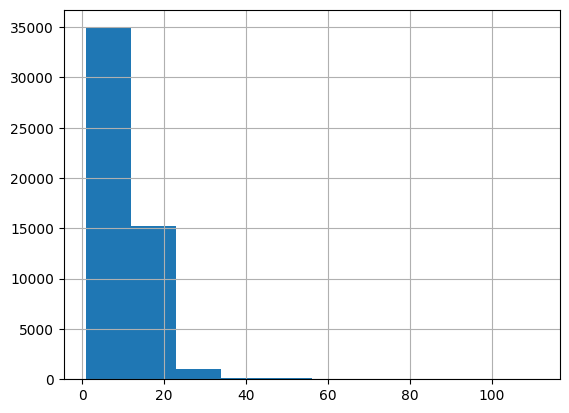

In [268]:
car['vehicle_age'].hist()

- majority of car are less than 10 years
- use the parameters `bins` and `range` to get more clear value
- since the max age is 110, put the `bins` for 110 to exact value

<Axes: >

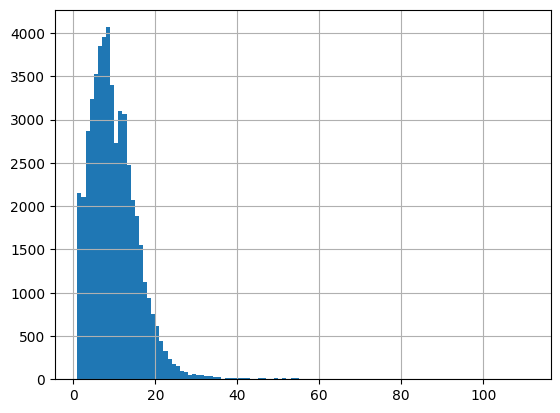

In [269]:
car['vehicle_age'].hist(bins = 110)

<Axes: >

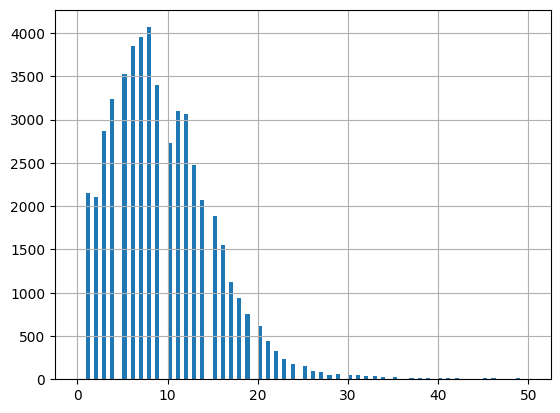

In [270]:
car['vehicle_age'].hist(bins = 110, range = (0,50))

- there's around 6000 vehicles that are 7 years old
- by the time vehicle reaches age 20 it has so little ads

### Study parameter `price`  <a id='para_price'></a>

In [271]:
car.describe()

,price,model_year,cylinders,odometer,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id
count,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793954,6.130810,115199.014508,2018-10-25 01:57:46.270742528,39.55476,2018.307462,9.513906,15378.482765,2.637535
min,1.000000,1908.000000,3.000000,0.000000,2018-05-01 00:00:00,0.00000,2018.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,2018-07-29 00:00:00,19.00000,2018.000000,5.000000,9363.636364,2.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,2018-10-25 00:00:00,33.00000,2018.000000,9.000000,13036.181818,3.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,2019-01-21 00:00:00,53.00000,2019.000000,13.000000,18222.222222,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,2019-04-19 00:00:00,271.00000,2019.000000,111.000000,373200.000000,5.000000
std,10040.803015,6.099296,1.658414,60484.863376,NaN,28.20427,0.461447,6.112976,11808.757090,0.712447


- The lowest price for a car is 1, that is impossible
- The higehst price compare to 75% has a huge gap, there's probably a huge outlier, use boxplot to visualize the data
- Plot a histogram for the price column

<Axes: >

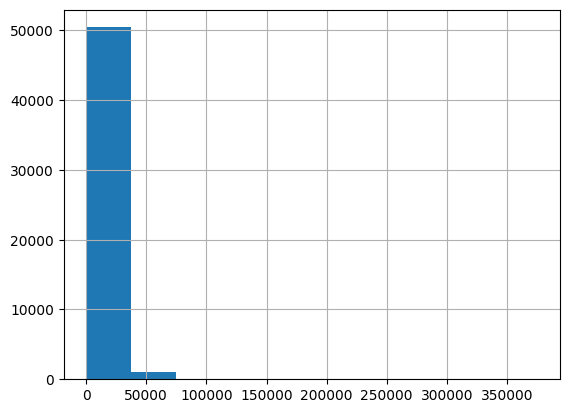

In [272]:
# Plot a histogram for the price column

car['price'].hist(bins = 10)

- Majority of vehicle prices are lower than 100000
- There's not much repeated pricing in the range of 100000 and 350000 
- Increase the bins, and zoom in to range 100000

<Axes: >

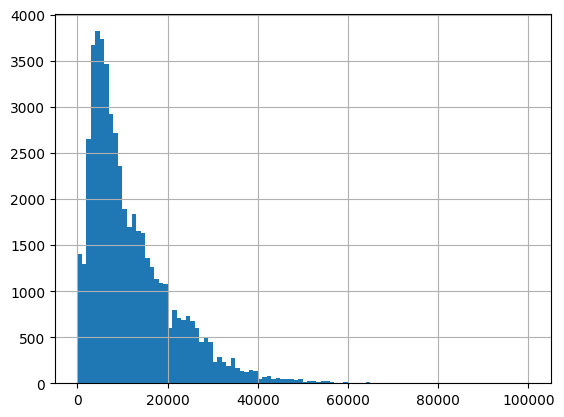

In [273]:
car['price'].hist(bins = 100, range = (0,100000))

- Majority of prices are below 20000
- The peak repeated price is around 10000   
- Use boxplot to find the outlier

In [274]:
# Create a new dataframe that only has the column for price
# https://sparkbyexamples.com/python/pandas-create-new-dataframe-by-selecting-specific-columns/

car_price = car.filter(['price'], axis=1)

(-10000.0, 50000.0)

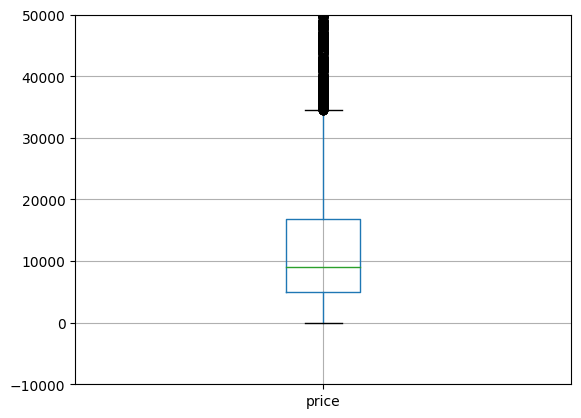

In [275]:
car_price.boxplot()

plt.ylim(-10000, 50000)

- From the boxplot there are obvious outliers
- There are 2 prices that are so high that exceeds 200000
- Find the range for plotted and calculated value for Q1, Q2, Q3 and IQR
- Zoom in on the boxplot for more precise value

In [276]:
# Compare with the plotted to theoretical value

Q1_price = car['price'].quantile(0.25)
Q3_price = car['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
print("First quartile:", Q1_price)
print("Third quartile:", Q3_price) 
print("IQR:", IQR_price) 

First quartile: 5000.0
Third quartile: 16839.0
IQR: 11839.0


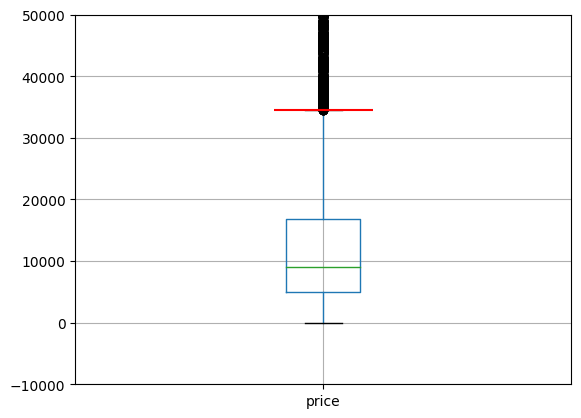

In [277]:
# Do a red line for the theoretical upper whisker

car_price.boxplot()

plt.ylim(-10000, 50000)
plt.hlines(y=Q3_price+1.5*IQR_price, xmin=0.9, xmax=1.1, color='red')

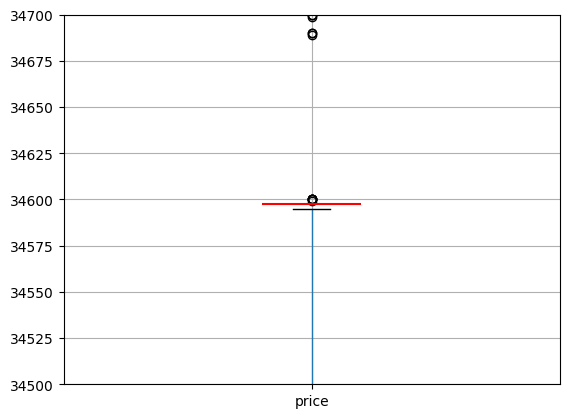

In [278]:
# Zoom in for a more precise reading

car_price.boxplot()

plt.ylim(34500, 34700)
plt.hlines(y=Q3_price+1.5*IQR_price, xmin=0.9, xmax=1.1, color='red')

- the theoretical upper whisker is slightly higher than the plotted
- howevere the difference are not major so the plotted upper whisker are valid
- the outlier for maximum price is 34600
- the outliers will be treated at chapter 1.7

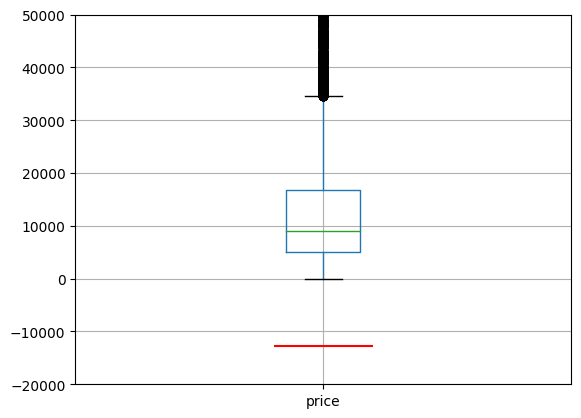

In [279]:
# Do a red line for the theoretical lower whisker

car_price.boxplot()

plt.ylim(-20000, 50000)
plt.hlines(y=Q1_price-1.5*IQR_price, xmin=0.9, xmax=1.1, color='red')

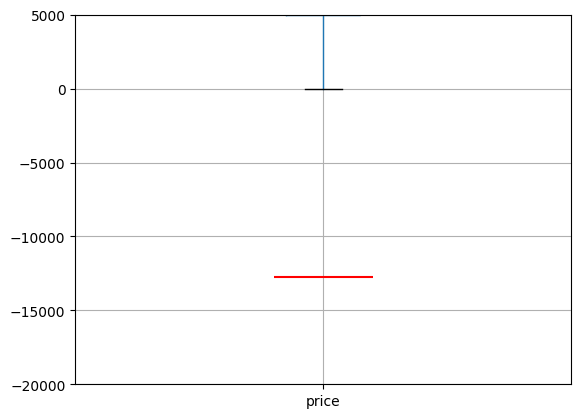

In [280]:
# Zoom in for a more precise reading
car_price.boxplot()

plt.ylim(-20000, 5000)
plt.hlines(y=Q1_price-1.5*IQR_price, xmin=0.9, xmax=1.1, color='red')

- Majority of the prices are so low that the theoretical value exceed 1 price which is the minimum

### Study parameter `avg_mileage` <a id='para_mileage'></a>

In [281]:
# Create a new dataframe that only has the column for price
# https://sparkbyexamples.com/python/pandas-create-new-dataframe-by-selecting-specific-columns/

car_avg_mileage = car.filter(['avg_mileage'], axis=1)

(-50000.0, 300000.0)

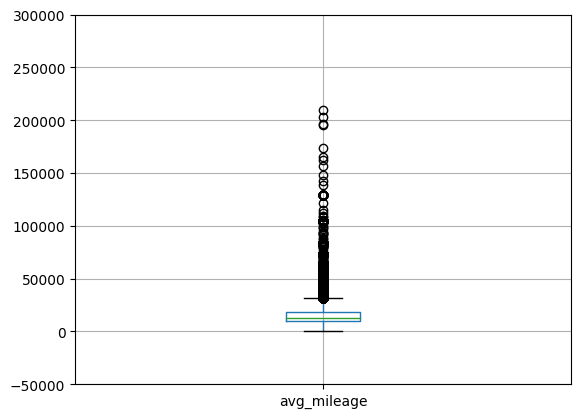

In [282]:
# Use boxplot() to see the plotted values 

car_avg_mileage.boxplot()

plt.ylim(-50000, 300000)

- From the boxplot there are obvious outliers
- The obvious outliers exceeds 50000
- Find the range for plotted and calculated value for Q1, Q2, Q3 and IQR
- Zoom in on the boxplot for more precise value

In [283]:
# Compare with the plotted to theoretical value

Q1_avg_mileage = car['avg_mileage'].quantile(0.25)
Q3_avg_mileage = car['avg_mileage'].quantile(0.75)
IQR_avg_mileage = Q3_avg_mileage - Q1_avg_mileage
print("First quartile:", Q1_avg_mileage)
print("Third quartile:", Q3_avg_mileage)
print("IQR:", IQR_avg_mileage) 

First quartile: 9363.636363636364
Third quartile: 18222.222222222223
IQR: 8858.585858585859


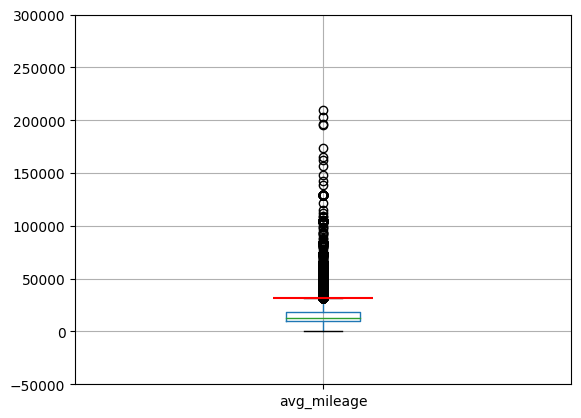

In [284]:
# Do a red line for the theoretical upper whisker

car_avg_mileage.boxplot()

plt.ylim(-50000, 300000)
plt.hlines(y=Q3_avg_mileage+1.5*IQR_avg_mileage, xmin=0.9, xmax=1.1, color='red')

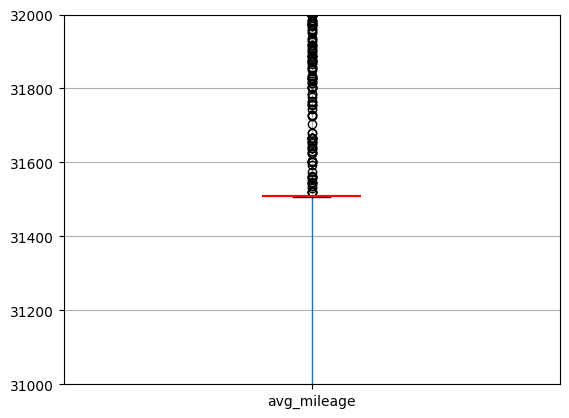

In [285]:
# Zoom in for a more precise reading

car_avg_mileage.boxplot()

plt.ylim(31000, 32000)
plt.hlines(y=Q3_avg_mileage+1.5*IQR_avg_mileage, xmin=0.9, xmax=1.1, color='red')

- the theoretical upper whisker is slightly higher than the plotted
- howevere the difference are not major so the plotted upper whisker are valid
- the outlier for average mileage is 41000
- the outliers will be treated at chapter 1.7

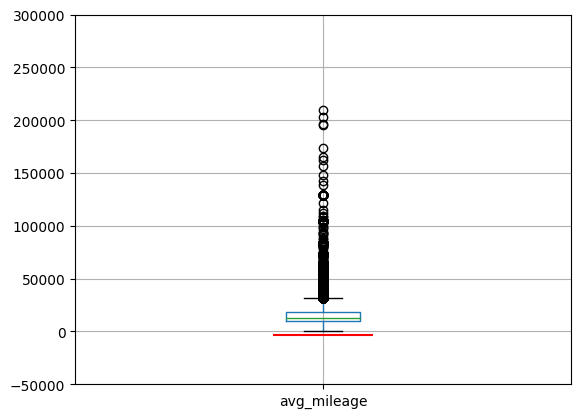

In [286]:
# Do a red line for the theoretical lower whisker

car_avg_mileage.boxplot()

plt.ylim(-50000, 300000)
plt.hlines(y=Q1_avg_mileage-1.5*IQR_avg_mileage, xmin=0.9, xmax=1.1, color='red')

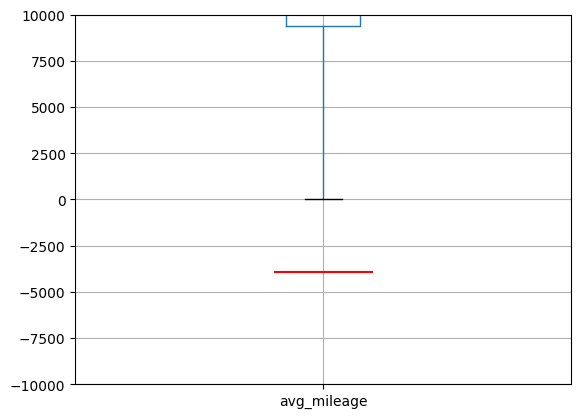

In [287]:
# Zoom in for a more precise reading
car_avg_mileage.boxplot()

plt.ylim(-10000, 10000)
plt.hlines(y=Q1_avg_mileage-1.5*IQR_avg_mileage, xmin=0.9, xmax=1.1, color='red')

- Majority of the average mileage are so low that the theoretical value exceed 0 average mileage which is the minimum

### Study parameter `cylinders` <a id='para_cylinder'></a>
- Because the data is numeric and discrete uses histogram and pie chart

<Axes: >

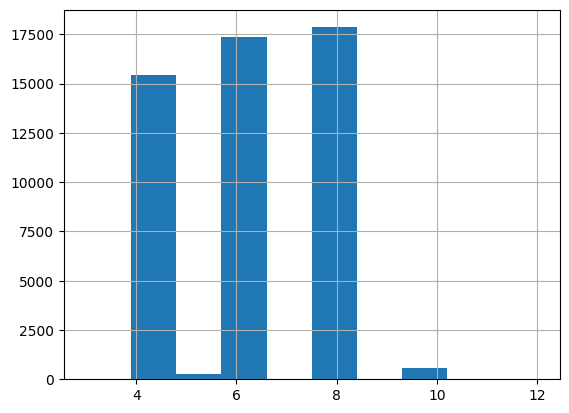

In [288]:
car['cylinders'].hist()

In [289]:
car_cylinders = car.pivot_table(
    index='cylinders',
    values='condition',
    aggfunc='count')
car_cylinders.sort_values(by = 'condition', ascending = False)

,condition
cylinders,
8.0,17859
6.0,17391
4.0,15414
10.0,553
5.0,272
3.0,34
12.0,2


<Axes: ylabel='condition'>

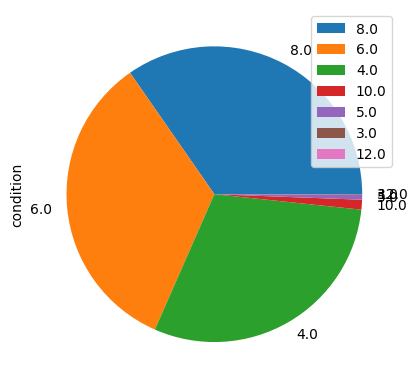

In [290]:
car_cylinders.sort_values(by = 'condition', ascending = False).plot(kind = 'pie', y='condition')

- since the `cylinders` with 3, 5, 10 and 12 have miniscule counts, compile them into `other`

In [291]:
car['cylinders_other'] = car['cylinders'].where(~car['cylinders'].isin([3,5,10,12]),'others')

In [292]:
car_cylinders = car.pivot_table(
    index='cylinders_other',
    values='condition',
    aggfunc='count')
car_cylinders.sort_values(by = 'condition', ascending = False)

,condition
cylinders_other,
8.0,17859
6.0,17391
4.0,15414
others,861


<Axes: ylabel='condition'>

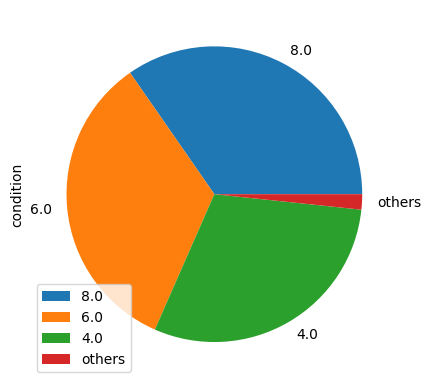

In [293]:
car_cylinders.sort_values(by = 'condition', ascending = False).plot(kind = 'pie', y='condition')

- the 3 biggest counts are vehichles with 8, 6 and 4 cylinders

### Study parameter `condition` <a id='para_condition'></a>

- condition of a vehicle is depend on the vehicle age

In [294]:
car['condition'].value_counts()

condition
excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: count, dtype: int64

In [295]:
condition_age = car.pivot_table(
    index = 'condition',
    values = 'vehicle_age',
    aggfunc = 'count').sort_values(by = 'vehicle_age', ascending = False)
condition_age

,vehicle_age
condition,
excellent,24773
good,20145
like new,4742
fair,1607
new,143
salvage,115


<Axes: ylabel='vehicle_age'>

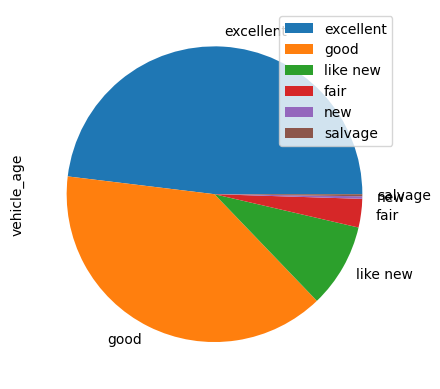

In [296]:
condition_age.sort_values(by = 'vehicle_age', ascending = False).plot(kind = 'pie', y='vehicle_age')

- combine the `fair`, `salvage` and `new` to just `other`

In [297]:
car['condition_other'] = car['condition'].where(~car['condition'].isin(['fair','salvage','new']),'others')

In [298]:
condition_age = car.pivot_table(
    index = 'condition_other',
    values = 'vehicle_age',
    aggfunc = 'count').sort_values(by = 'vehicle_age', ascending = False)
condition_age

,vehicle_age
condition_other,
excellent,24773
good,20145
like new,4742
others,1865


<Axes: ylabel='vehicle_age'>

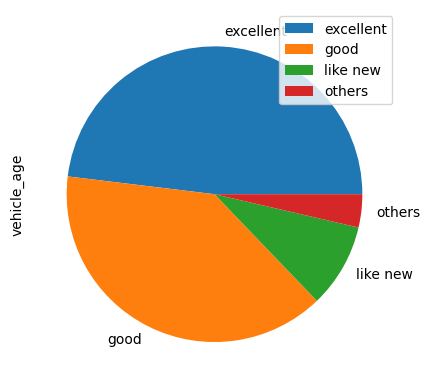

In [299]:
condition_age.sort_values(by = 'vehicle_age', ascending = False).plot(kind = 'pie', y='vehicle_age')

- vehicle with excellent condition takes almost half of the total
- majority of the vehicles are in excellent, good or like new condition

## Study and treat outliers <a id='outliers'></a>

<Axes: >

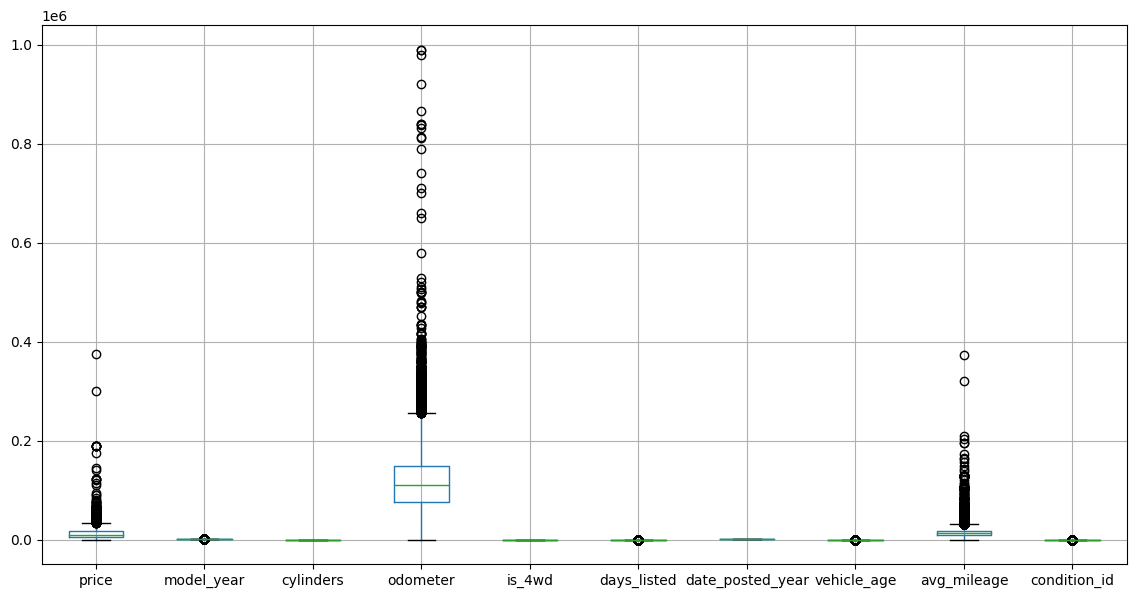

In [300]:
car.boxplot(figsize = (14,7))

There's 3 column that has obvious outliers `price`, `odometer` and `avg_mileage`

### Study outliers for `odometer` <a id='outliers_odometer'></a>

In [301]:
# Create a new dataframe that only has the column for odometer
# https://sparkbyexamples.com/python/pandas-create-new-dataframe-by-selecting-specific-columns/

car_odometer = car.filter(['odometer'], axis=1)

<Axes: >

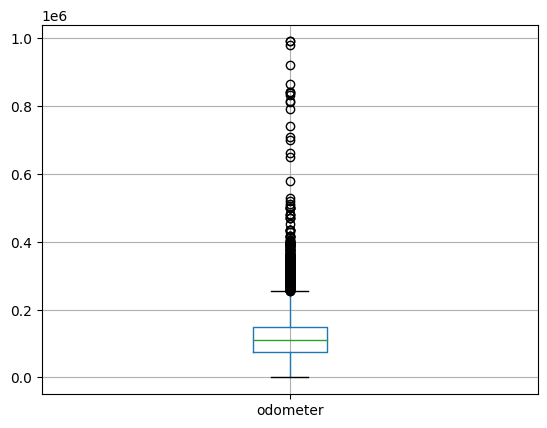

In [302]:
car_odometer.boxplot()

(-50000.0, 300000.0)

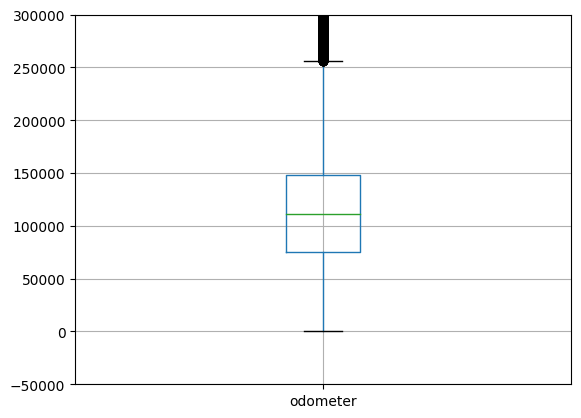

In [303]:
# Use boxplot() to see the plotted values 
car_odometer.boxplot()
plt.ylim(-50000, 300000)

In [304]:
# Compare with the plotted to theoretical value

Q1_odometer = car['odometer'].quantile(0.25)
Q3_odometer = car['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer
print("First quartile:", Q1_odometer)
print("Third quartile:", Q3_odometer) 
print("IQR:", Q3_odometer)

First quartile: 75668.0
Third quartile: 147821.0
IQR: 147821.0


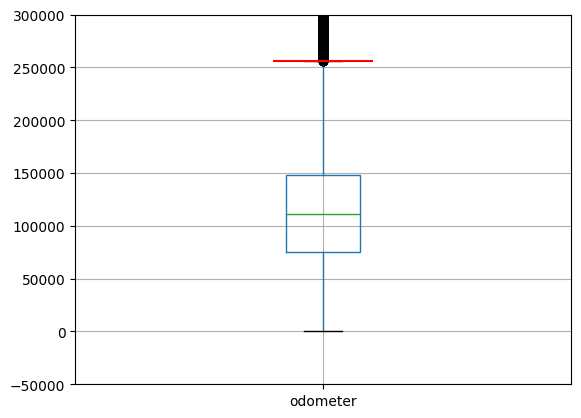

In [305]:
# Do a red line for the theoretical upper whisker
car_odometer.boxplot()
plt.ylim(-50000, 300000)
plt.hlines(y=Q3_odometer+1.5*IQR_odometer, xmin=0.9, xmax=1.1, color='red')

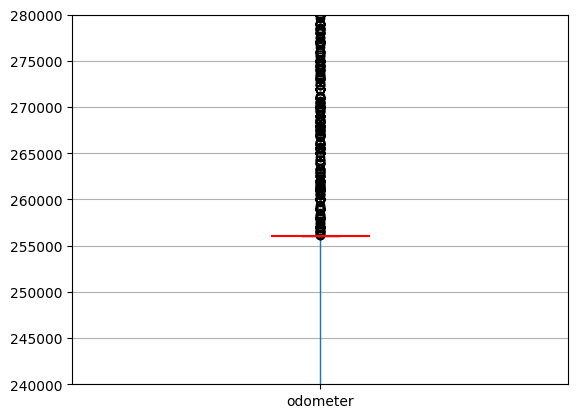

In [306]:
# Zoom in for a more precise reading
car_odometer.boxplot()
plt.ylim(240000, 280000)
plt.hlines(y=Q3_odometer+1.5*IQR_odometer, xmin=0.9, xmax=1.1, color='red')

- the theoretical upper whisker is slightly higher than the plotted
- howevere the difference are not major so the plotted upper whisker are valid
- the outlier for maximum price is 255000

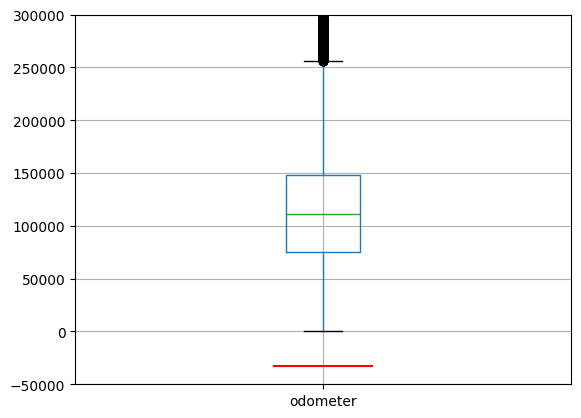

In [307]:
# Do a red line for the theoretical lower whisker
car_odometer.boxplot()
plt.ylim(-50000, 300000)
plt.hlines(y=Q1_odometer-1.5*IQR_odometer, xmin=0.9, xmax=1.1, color='red')

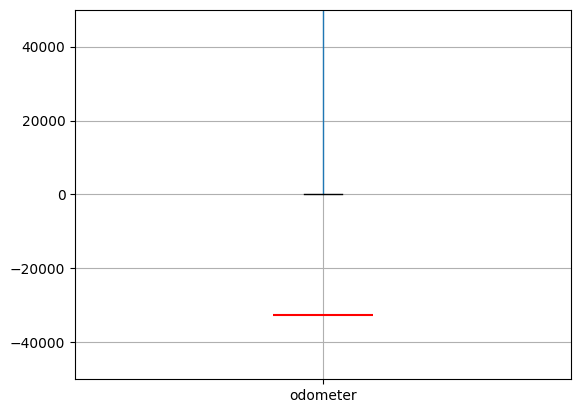

In [308]:
# Zoom in for a more precise reading
car_odometer.boxplot()
plt.ylim(-50000, 50000)
plt.hlines(y=Q1_odometer-1.5*IQR_odometer, xmin=0.9, xmax=1.1, color='red')

- Majority of the prices are so low that the theoretical value exceed 1 price which is the minimum
- However since odometer having a 0 value makes sense (the car is new so it has never been driven)

In [309]:
# steps to remove outliers and explain
# remove data with value < Q1,quantile(0.05)
# remove data with value > Q3,quantile(0.95)
car.query('odometer > (0.95*255000)')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id,brand,cylinders_other,condition_other
33,3890,2011.0,subaru outback,excellent,4.0,gas,300000.0,automatic,SUV,white,True,2018-12-25,31,2018,8,37500.000000,3,subaru,4.0,excellent
45,2400,2001.0,toyota camry,good,4.0,gas,277564.0,automatic,coupe,yellow,False,2018-05-27,51,2018,18,15420.222222,2,toyota,4.0,good
49,3200,2006.0,honda civic,excellent,4.0,gas,255390.0,automatic,sedan,blue,False,2018-10-18,23,2018,13,19645.384615,3,honda,4.0,excellent
140,2000,1993.0,ford f-150,good,8.0,gas,258225.0,automatic,truck,red,False,2019-03-06,34,2019,27,9563.888889,2,ford,8.0,good
267,3250,2001.0,ford f150,fair,8.0,gas,296000.0,automatic,truck,black,True,2018-12-07,24,2018,18,16444.444444,1,ford,8.0,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51250,1400,2009.0,chevrolet tahoe,good,8.0,gas,294000.0,automatic,SUV,black,True,2019-04-12,84,2019,11,26727.272727,2,chevrolet,8.0,good
51260,2900,2005.0,toyota sienna,good,6.0,gas,283771.0,automatic,wagon,yellow,False,2018-05-02,61,2018,14,20269.357143,2,toyota,6.0,good
51271,1000,2002.0,hyundai elantra,fair,4.0,gas,250000.0,manual,hatchback,red,False,2018-10-08,17,2018,17,14705.882353,1,hyundai,4.0,others
51292,1600,2009.0,honda civic,good,4.0,gas,250000.0,automatic,coupe,silver,False,2018-11-26,19,2018,10,25000.000000,2,honda,4.0,good


In [310]:
upper_outlier = len(car.query('odometer > (0.95*255000)')) / len(car)

print(f'Percentage of odomter more than 255000 compare to car dataframe: {upper_outlier:.0%}')

Percentage of odomter more than 255000 compare to car dataframe: 3%


In [311]:
# Drop rows that have odometer more than 247600
# Instead of dropping from the original df, create a new variable dataframe for the filtered outlier

car_drop_outlier = car.drop(car[car['odometer'] > (0.95*255000)].index)

In [312]:
car_drop_outlier.shape

(50176, 20)

- create a new variable to differentiate original df and df without outliers
- the upper outlier after odometer 255000 are drop
- while the lower outlier does not to drop, because assume if it's 0 odometer than the car has never driven past 1km

### Study outliers for `price` <a id='outliers_price'></a>

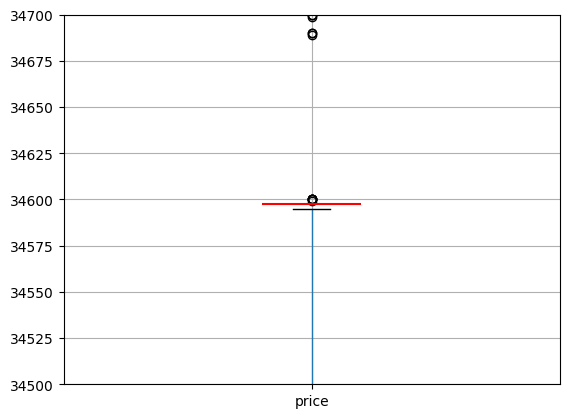

In [313]:
# Zoom in for a more precise reading

car_price.boxplot()

plt.ylim(34500, 34700)
plt.hlines(y=Q3_price+1.5*IQR_price, xmin=0.9, xmax=1.1, color='red')

- the theoretical upper whisker is slightly higher than the plotted
- howevere the difference are not major so the plotted upper whisker are valid
- the outlier for maximum price is 34600
- drop the outliers that are above the price 34600

In [314]:
car_drop_outlier.shape

(50176, 20)

In [315]:
car.query('price > (0.95*34600)')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id,brand,cylinders_other,condition_other
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,104230.0,automatic,van,black,False,2019-01-15,16,2019,7,14890.000000,3,mercedes-benz,6.0,excellent
99,39950,2018.0,chevrolet silverado,excellent,8.0,gas,18500.0,automatic,truck,unknown,True,2018-08-05,16,2018,1,18500.000000,3,chevrolet,8.0,excellent
120,33900,2018.0,chevrolet silverado 1500 crew,good,8.0,gas,11315.0,other,pickup,white,True,2019-03-01,2,2019,2,5657.500000,2,chevrolet,8.0,good
124,37000,2018.0,chevrolet silverado 1500 crew,good,8.0,gas,30465.0,other,pickup,white,True,2019-01-13,55,2019,2,15232.500000,2,chevrolet,8.0,good
142,39990,2015.0,chevrolet corvette,like new,8.0,gas,17340.0,manual,coupe,unknown,False,2018-07-14,38,2018,4,4335.000000,4,chevrolet,8.0,like new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51342,40990,2016.0,ram 1500,excellent,8.0,diesel,107930.0,automatic,truck,white,True,2019-03-17,23,2019,4,26982.500000,3,ram,8.0,excellent
51447,33990,2019.0,ram 1500,excellent,8.0,gas,9000.0,automatic,truck,white,True,2019-01-25,36,2019,1,9000.000000,3,ram,8.0,excellent
51463,35500,2015.0,gmc sierra 2500hd,good,8.0,diesel,106973.0,automatic,truck,black,True,2018-05-04,15,2018,4,26743.250000,2,gmc,8.0,good
51465,34595,2008.0,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,True,2019-04-18,13,2019,12,7204.666667,3,gmc,8.0,excellent


In [316]:
upper_outlier = len(car.query('price > (0.95*34600)')) / len(car)

print(f'Percentage of price more than 34600 compare to car dataframe: {upper_outlier:.0%}')

Percentage of price more than 34600 compare to car dataframe: 4%


In [317]:
# Drop rows that have prices more than 34600

car_drop_outlier = car_drop_outlier.drop(car_drop_outlier[car_drop_outlier['price'] > (0.95*34600)].index)

In [318]:
car_drop_outlier.shape

(48154, 20)

- right now the price that above upper outlier is drop
- however there are prices that does not make sense for a vehicle to have (price < 5000)

In [319]:
car.query('odometer < 5000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id,brand,cylinders_other,condition_other
73,1900,1994.0,jeep grand cherokee laredo,good,6.0,gas,207.0,automatic,SUV,grey,True,2018-07-27,9,2018,25,8.280000,2,jeep,6.0,good
111,29900,2018.0,ford mustang gt coupe 2d,good,8.0,gas,3827.0,automatic,coupe,yellow,False,2019-03-22,48,2019,2,1913.500000,2,ford,8.0,good
116,25300,2017.0,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,unknown,False,2018-06-16,34,2018,2,1784.000000,2,chevrolet,6.0,good
222,2750,2006.0,honda civic lx,good,4.0,gas,200.0,manual,sedan,black,False,2018-07-06,41,2018,13,15.384615,2,honda,4.0,good
352,7997,2009.0,gmc yukon,excellent,8.0,gas,0.0,automatic,SUV,white,True,2019-03-16,88,2019,11,0.000000,3,gmc,8.0,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51020,6995,2009.0,honda accord,excellent,4.0,gas,123.0,automatic,sedan,green,False,2019-03-02,67,2019,11,11.181818,3,honda,4.0,excellent
51189,5000,2001.0,ford mustang,excellent,8.0,gas,0.0,manual,coupe,silver,False,2019-01-20,67,2019,19,0.000000,3,ford,8.0,excellent
51252,5200,2007.0,toyota camry le,excellent,4.0,gas,102.0,automatic,sedan,silver,False,2018-12-21,17,2018,12,8.500000,3,toyota,4.0,excellent
51328,22995,2009.0,gmc sierra 2500hd,excellent,8.0,gas,187.0,automatic,truck,black,True,2018-06-10,37,2018,10,18.700000,3,gmc,8.0,excellent


In [320]:
# Drop rows that have prices less than 5000

car_drop_outlier = car_drop_outlier.drop(car_drop_outlier[car_drop_outlier['price'] < 5000].index)

In [321]:
car_drop_outlier.shape

(36062, 20)

### Study outliers for `avg_mileage` <a id='outliers_mileage'></a>

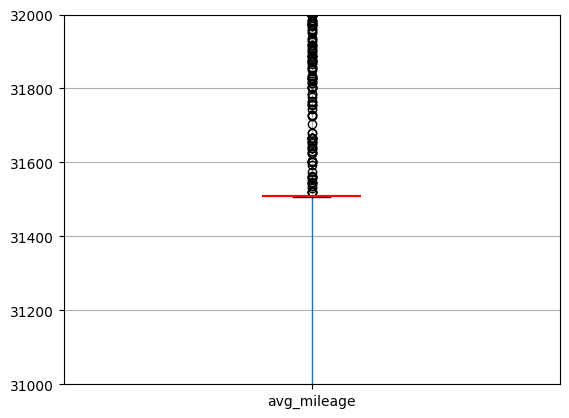

In [322]:
# Zoom in for a more precise reading
car_avg_mileage.boxplot()
plt.ylim(31000, 32000)
plt.hlines(y=Q3_avg_mileage+1.5*IQR_avg_mileage, xmin=0.9, xmax=1.1, color='red')

- the theoretical upper whisker is slightly higher than the plotted
- howevere the difference are not major so the plotted upper whisker are valid
- the outlier for average mileage is 31500
- drop outlier that average mileage higher than 31500

In [323]:
car_drop_outlier.shape

(36062, 20)

In [324]:
car.query('avg_mileage > (0.95*31500)')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id,brand,cylinders_other,condition_other
19,13990,2018.0,hyundai elantra,excellent,4.0,gas,31932.0,automatic,sedan,red,False,2018-08-25,27,2018,1,31932.000000,3,hyundai,4.0,excellent
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,72982.5,automatic,sedan,unknown,False,2018-07-26,43,2018,2,36491.250000,4,chevrolet,4.0,like new
33,3890,2011.0,subaru outback,excellent,4.0,gas,300000.0,automatic,SUV,white,True,2018-12-25,31,2018,8,37500.000000,3,subaru,4.0,excellent
41,11995,2017.0,nissan rogue,like new,4.0,gas,72982.5,automatic,SUV,silver,True,2018-09-20,21,2018,2,36491.250000,4,nissan,4.0,like new
88,26000,2017.0,ford mustang gt coupe 2d,good,8.0,gas,129000.0,other,coupe,yellow,False,2018-11-26,31,2018,2,64500.000000,2,ford,8.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51456,12995,2017.0,dodge grand caravan,excellent,6.0,gas,98353.0,automatic,mini-van,white,False,2019-03-01,33,2019,3,32784.333333,3,dodge,6.0,excellent
51475,17980,2017.0,subaru outback,excellent,4.0,gas,78468.0,automatic,SUV,white,True,2018-11-16,9,2018,2,39234.000000,3,subaru,4.0,excellent
51488,21900,2013.0,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,True,2018-12-27,37,2018,6,33833.333333,3,chevrolet,8.0,excellent
51504,20481,2018.0,toyota camry,like new,4.0,gas,38590.0,automatic,sedan,silver,False,2018-12-06,4,2018,1,38590.000000,4,toyota,4.0,like new


In [325]:
upper_outlier = len(car.query('avg_mileage > (0.95*31500)')) / len(car)

print(f'Percentage of average mileage more than 31500 compare to car dataframe: {upper_outlier:.0%}')

Percentage of average mileage more than 31500 compare to car dataframe: 7%


In [326]:
# Drop rows that have average miles more than 31500

car_drop_outlier = car_drop_outlier.drop(car_drop_outlier[car_drop_outlier['avg_mileage'] > (0.95*31500)].index)

In [327]:
# Dataframe with outliers

car.shape

(51525, 20)

In [328]:
# Dataframe without outliers

car_drop_outlier.shape

(33489, 20)

- the difference between the rows of original df and rows of df without outliers are 13%
- the huge outliers column `odometer`, `price` and `avg_mileage` have drop rows

## Study core parameters without outliers <a id='wo_outliers'></a>

<Axes: >

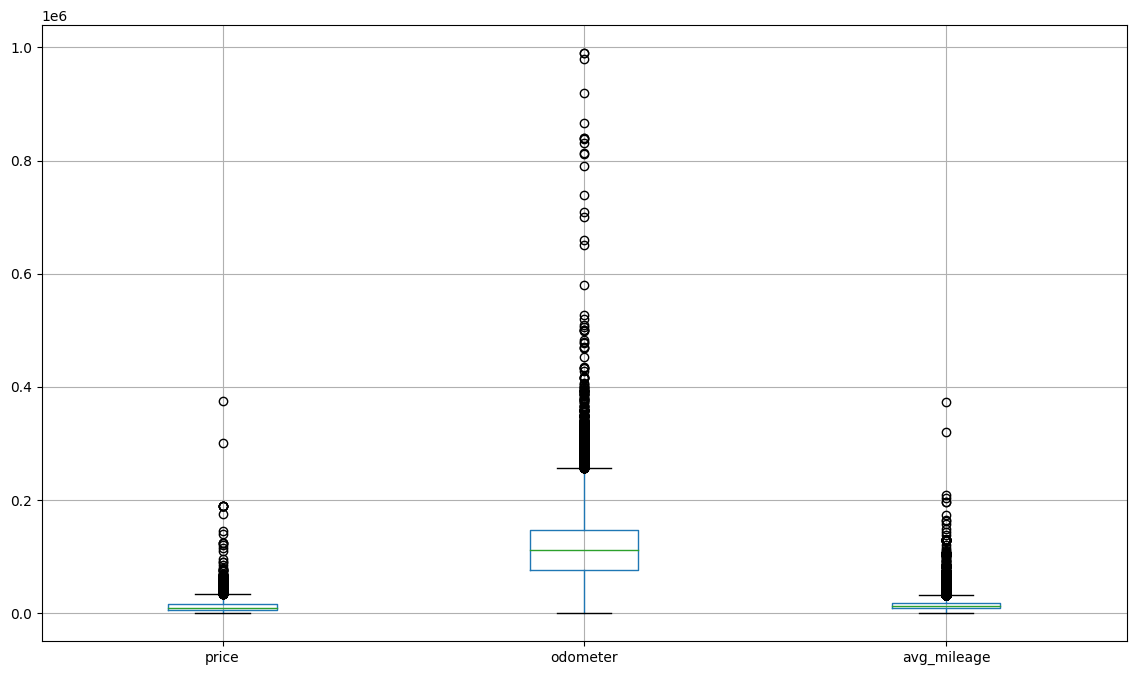

In [329]:
car.boxplot(column=['price', 'odometer', 'avg_mileage'], figsize = (14,8))

<Axes: >

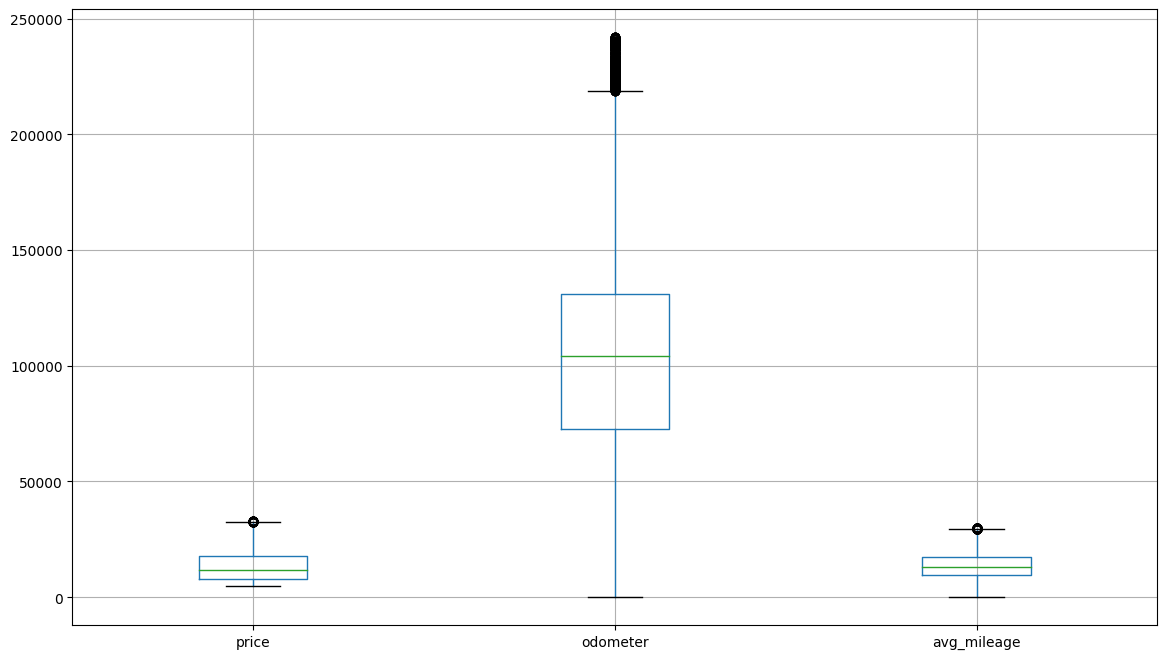

In [330]:
car_drop_outlier.boxplot(column=['price', 'odometer', 'avg_mileage'], figsize = (14,8))

## Ads lifetime <a id='ads'></a>

- study the column of `days_listed`
- count how many values in the `days_listed` column and sort in descending order to find out the most `days_listed`
- use median or mean to find the typical life of an ad
- days_listed relates with type, condition
- use boxplot
- abnormally long time higher than upper whisker
- removed quickly lower than lower whisker
- minimum days is 0, while maximum days is 271

In [331]:
car.describe()

,price,model_year,cylinders,odometer,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id
count,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.00000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.793954,6.130810,115199.014508,2018-10-25 01:57:46.270742528,39.55476,2018.307462,9.513906,15378.482765,2.637535
min,1.000000,1908.000000,3.000000,0.000000,2018-05-01 00:00:00,0.00000,2018.000000,1.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,75668.000000,2018-07-29 00:00:00,19.00000,2018.000000,5.000000,9363.636364,2.000000
50%,9000.000000,2011.000000,6.000000,110908.000000,2018-10-25 00:00:00,33.00000,2018.000000,9.000000,13036.181818,3.000000
75%,16839.000000,2014.000000,8.000000,147821.000000,2019-01-21 00:00:00,53.00000,2019.000000,13.000000,18222.222222,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,2019-04-19 00:00:00,271.00000,2019.000000,111.000000,373200.000000,5.000000
std,10040.803015,6.099296,1.658414,60484.863376,NaN,28.20427,0.461447,6.112976,11808.757090,0.712447


In [332]:
car_drop_outlier.pivot_table(
    index = 'condition',
    values = 'days_listed',
    aggfunc = 'mean').sort_values(by = 'days_listed', ascending = False)

,days_listed
condition,
salvage,44.366667
excellent,39.653528
good,39.495266
like new,39.321903
fair,37.173387
new,34.140625


In [333]:
car_drop_outlier.pivot_table(
    index = 'condition',
    values = 'days_listed',
    aggfunc = 'median').sort_values(by = 'days_listed', ascending = False)

,days_listed
condition,
salvage,43
excellent,33
good,33
like new,33
new,33
fair,31


- the median and mean of `days_listed` are close to equal regardless of their condition

In [334]:
car_listed = car.filter(['days_listed'], axis=1)

<Axes: >

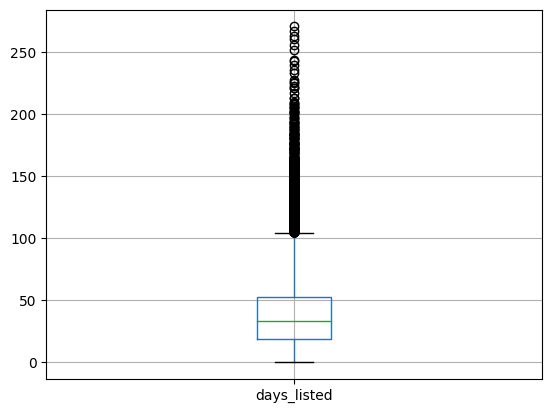

In [335]:
car_listed.boxplot()

In [336]:
Q1_ads = car['days_listed'].quantile(0.25)
Q2_ads = car['days_listed'].quantile(0.5)
Q3_ads = car['days_listed'].quantile(0.75)
IQR_ads = Q3_ads - Q1_ads
print("First quartile:", Q1_ads)
print("Median:", Q2_ads)
print("Third quartile:", Q3_ads)
print("IQR:", IQR_ads) 

First quartile: 19.0
Median: 33.0
Third quartile: 53.0
IQR: 34.0


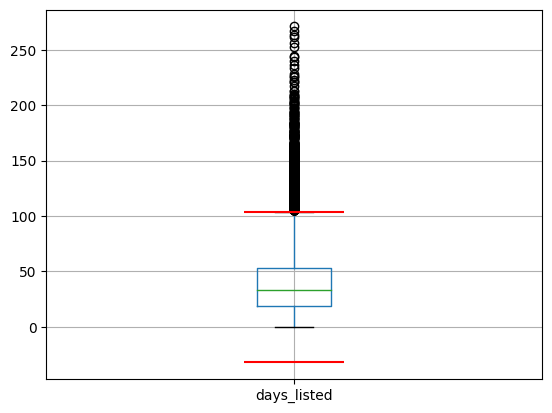

In [337]:
car_listed.boxplot()

plt.hlines(y=Q3_ads+1.5*IQR_ads, xmin=0.9, xmax=1.1, color='red')
plt.hlines(y=Q1_ads-1.5*IQR_ads, xmin=0.9, xmax=1.1, color='red')

- usully ads took too long if the ads stay for more than 100 days
- the ads lifetime appropraite for around 33 days
- 19 days or earlier is considered too fast for the ads lifetime for the vehicle

## Average price per each type of vehicle <a id='mean_price'></a>

In [338]:
# The number of types of vehicle on the ads

car_drop_outlier['type'].value_counts()

type
truck          8771
SUV            8329
sedan          6677
pickup         4821
coupe          1563
wagon          1042
mini-van        650
hatchback       589
van             363
convertible     327
other           175
offroad         166
bus              16
Name: count, dtype: int64

<Axes: xlabel='type'>

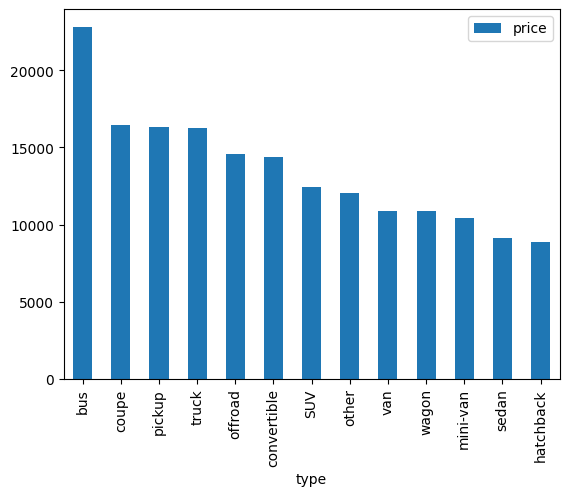

In [339]:
# The average of price according to vehicle types

car_drop_outlier.pivot_table(
    index = 'type', 
    values = 'price', 
    aggfunc = 'mean'
).sort_values(by='price', ascending = False).plot(kind = 'bar')

- while the bus is the lowest count of the entire dataframe, it is the highest average price of all types of vehicles
- the bus has a high average because the number of ads for bus type is small
- sedan is the inverse it has the third most ad of type vehicles but it has the second lowest average price
- SUV has the second highest amount of ads, but the placed on the middle when sorting by average price 
- truck, pickup, and coupe type vehicles has the most ads and also has the most average price
- continue analysis using vehicle type truck and SUV

## Price factors <a id='price_factors'></a>

[What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.]

### Price factors for only truck <a id='price_truck'></a>

In [340]:
truck_query = car_drop_outlier.query('type == "truck"')
truck_query

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id,brand,cylinders_other,condition_other
22,7500,2004.0,chevrolet silverado,like new,8.0,gas,180000.0,automatic,truck,red,True,2019-01-05,64,2019,16,11250.000000,4,chevrolet,8.0,like new
39,8000,2009.0,ford f-150,good,8.0,gas,234000.0,automatic,truck,black,True,2019-03-31,1,2019,11,21272.727273,2,ford,8.0,good
50,6200,2006.0,ford f-150,excellent,6.0,gas,69698.0,automatic,truck,custom,False,2018-05-03,50,2018,13,5361.384615,3,ford,6.0,excellent
53,10400,2012.0,chevrolet colorado,excellent,5.0,gas,111871.0,automatic,truck,red,True,2019-01-30,27,2019,8,13983.875000,3,chevrolet,others,excellent
60,13000,2005.0,ram 1500,good,8.0,gas,146000.0,automatic,truck,grey,True,2019-03-14,26,2019,15,9733.333333,2,ram,8.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,2008.0,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,True,2018-11-28,24,2018,11,12343.454545,2,ford,8.0,good
51466,21995,2014.0,ram 1500,excellent,8.0,gas,68870.0,automatic,truck,black,False,2018-05-23,15,2018,5,13774.000000,3,ram,8.0,excellent
51470,22000,2004.0,ram 1500,like new,8.0,gas,72982.5,automatic,truck,silver,False,2019-03-22,33,2019,16,4561.406250,4,ram,8.0,like new
51482,13900,2006.0,chevrolet silverado 1500,excellent,8.0,gas,152000.0,automatic,truck,unknown,True,2018-05-08,33,2018,13,11692.307692,3,chevrolet,8.0,excellent


In [341]:
# truck_query.corr()['price']
truck_query.select_dtypes(include=['number']).corr()

,price,model_year,cylinders,odometer,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id
price,1.000000,0.613067,0.004249,-0.479396,0.004701,0.016268,-0.610570,0.217551,0.242603
model_year,0.613067,1.000000,-0.098542,-0.411165,-0.007726,0.033512,-0.995260,0.533135,0.197505
cylinders,0.004249,-0.098542,1.000000,0.043371,0.017415,0.010044,0.099405,-0.062307,-0.039677
odometer,-0.479396,-0.411165,0.043371,1.000000,0.000675,-0.003679,0.410197,0.395631,-0.236824
days_listed,0.004701,-0.007726,0.017415,0.000675,1.000000,-0.001714,0.007532,-0.010634,0.015501
date_posted_year,0.016268,0.033512,0.010044,-0.003679,-0.001714,1.000000,0.063798,-0.086800,0.010791
vehicle_age,-0.610570,-0.995260,0.099405,0.410197,0.007532,0.063798,1.000000,-0.540813,-0.196159
avg_mileage,0.217551,0.533135,-0.062307,0.395631,-0.010634,-0.086800,-0.540813,1.000000,-0.022565
condition_id,0.242603,0.197505,-0.039677,-0.236824,0.015501,0.010791,-0.196159,-0.022565,1.000000


- the closest correlation with `price` for truck type are `model_year`, `odometer`, and `vehicle_age`

#### Truck price factors `vehicle_age` <a id='truck_age'></a>

In [342]:
truck_query['vehicle_age'].value_counts()

vehicle_age
8     1068
9      712
6      709
7      662
11     654
5      640
12     559
13     531
4      508
10     437
14     406
15     393
3      309
16     254
17     180
18     162
2      148
1      103
19      96
20      73
21      36
22      36
23      21
24      20
26       9
25       7
29       7
27       6
32       4
34       3
30       3
42       2
37       2
40       2
64       1
44       1
51       1
39       1
43       1
31       1
38       1
28       1
35       1
Name: count, dtype: int64

- truck at age 8 has the most ads
- new truck such as age 1, 2, 3 has around the middle number of ads 
- by the time the truck reaches 19 years it does not have much ads
- drop the car that is older than 18 years

In [343]:
truck_query.query('vehicle_age > 18')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id,brand,cylinders_other,condition_other
506,8500,2000.0,gmc sierra 1500,good,8.0,gas,161555.0,automatic,truck,unknown,True,2018-08-08,63,2018,19,8502.894737,2,gmc,8.0,good
549,7800,1997.0,toyota tacoma,good,6.0,gas,212234.0,automatic,truck,white,True,2018-06-28,89,2018,22,9647.000000,2,toyota,6.0,good
717,6900,1999.0,ford f350,excellent,10.0,gas,197502.0,manual,truck,white,False,2018-05-07,53,2018,20,9875.100000,3,ford,others,excellent
999,7000,1998.0,chevrolet silverado,excellent,8.0,gas,171000.0,automatic,truck,blue,True,2018-05-24,66,2018,21,8142.857143,3,chevrolet,8.0,excellent
1101,9200,1975.0,ford f-150,excellent,8.0,gas,104230.0,automatic,truck,green,False,2018-08-28,40,2018,44,2368.863636,3,ford,8.0,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50444,6500,1996.0,ram 2500,fair,6.0,diesel,238000.0,automatic,truck,unknown,False,2019-03-17,15,2019,24,9916.666667,1,ram,6.0,others
50573,5973,2000.0,toyota tundra,good,6.0,gas,129000.0,automatic,truck,unknown,False,2018-07-10,46,2018,19,6789.473684,2,toyota,6.0,good
50634,6000,2001.0,ford f-250,excellent,8.0,diesel,104230.0,automatic,truck,white,False,2019-04-06,19,2019,19,5485.789474,3,ford,8.0,excellent
50835,9500,1999.0,toyota tacoma,good,5.0,gas,220000.0,manual,truck,unknown,True,2018-11-30,23,2018,20,11000.000000,2,toyota,others,good


In [344]:
# Drop rows that truck age is older than 18

truck_age_query = truck_query.drop(truck_query[truck_query['vehicle_age'] > 18].index)

In [345]:
# Check new truck_query dataframe

truck_age_query['vehicle_age'].value_counts()

vehicle_age
8     1068
9      712
6      709
7      662
11     654
5      640
12     559
13     531
4      508
10     437
14     406
15     393
3      309
16     254
17     180
18     162
2      148
1      103
Name: count, dtype: int64

In [346]:
# find the median price

truck_age_query.pivot_table(
    index = 'vehicle_age',
    values = 'price',
    aggfunc = 'median')

,price
vehicle_age,
1,27990.0
2,27544.0
3,26000.0
4,24990.0
5,21625.0
6,19500.0
7,17469.0
8,15900.0
9,14950.0


- the values of truck decrease with age
- the truck age and price decreases propotionally

#### Truck price factors `model_year` <a id='truck_year'></a>

In [347]:
truck_year_query= truck_query.pivot_table(
    index = 'model_year',
    values = 'condition',
    aggfunc = 'count')
truck_year_query.sort_values(by = 'condition', ascending = False)

,condition
model_year,
2011.0,1148
2008.0,795
2013.0,725
2012.0,696
2014.0,653
2015.0,571
2010.0,551
2006.0,548
2007.0,469


In [348]:
truck_year_query.query('condition < 120')

,condition
model_year,
1955.0,1
1968.0,1
1975.0,1
1976.0,1
1977.0,2
1979.0,2
1981.0,2
1983.0,2
1984.0,1


- the oldest model_year ad for the truck type is from 1955
- the number of trucks are not propotional, regardless if new or old they have similar counts
- drop the trucks that are have less than 120 ads

In [349]:
# Drop rows that model_year is less than 2005

truck_year_query = truck_year_query.drop(truck_year_query[truck_year_query['condition'] < 120].index)

In [350]:
# Combine truck_year_query with truck_query

truck_year_query = truck_year_query.merge(right = truck_query, on = 'model_year', how = 'inner')
truck_year_query

,model_year,condition_x,price,model,condition_y,cylinders,fuel,odometer,transmission,type,...,is_4wd,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id,brand,cylinders_other,condition_other
0,2001.0,142,7900,ford f-250,excellent,10.0,gas,71000.0,automatic,truck,...,True,2018-12-02,23,2018,18,3944.444444,3,ford,others,excellent
1,2001.0,142,15990,gmc sierra 1500,good,8.0,gas,61030.0,automatic,truck,...,True,2018-06-19,13,2018,18,3390.555556,2,gmc,8.0,good
2,2001.0,142,8500,gmc sierra 1500,excellent,8.0,gas,104230.0,automatic,truck,...,True,2018-10-07,22,2018,18,5790.555556,3,gmc,8.0,excellent
3,2001.0,142,11500,ford f-250 super duty,excellent,8.0,diesel,190237.0,automatic,truck,...,True,2018-10-28,64,2018,18,10568.722222,3,ford,8.0,excellent
4,2001.0,142,5000,nissan frontier,good,4.0,gas,129000.0,manual,truck,...,False,2019-02-09,40,2019,19,6789.473684,2,nissan,4.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8442,2018.0,121,28990,chevrolet silverado 1500,excellent,8.0,gas,13156.0,automatic,truck,...,True,2018-06-05,51,2018,1,13156.000000,3,chevrolet,8.0,excellent
8443,2018.0,121,32340,ram 1500,excellent,8.0,gas,8394.0,automatic,truck,...,True,2018-05-06,14,2018,1,8394.000000,3,ram,8.0,excellent
8444,2018.0,121,28990,ford f-150,excellent,8.0,gas,10622.0,automatic,truck,...,True,2018-11-23,31,2018,1,10622.000000,3,ford,8.0,excellent
8445,2018.0,121,27890,ram 1500,excellent,8.0,gas,9446.0,automatic,truck,...,True,2018-05-06,39,2018,1,9446.000000,3,ram,8.0,excellent


In [351]:
# find the median price

truck_year_query .pivot_table(
    index = 'model_year',
    values = 'price',
    aggfunc = 'median').sort_values(by = 'price', ascending = False)

,price
model_year,
2018.0,27990.0
2017.0,27988.0
2016.0,25900.0
2015.0,24250.0
2014.0,20995.0
2013.0,18995.0
2012.0,16500.0
2011.0,15500.0
2010.0,14500.0


- similar to price the sedan, as it grows older it the price will also become decreases

#### Truck price factors `odometer` <a id='truck_odometer'></a>

<Axes: xlabel='odometer', ylabel='price'>

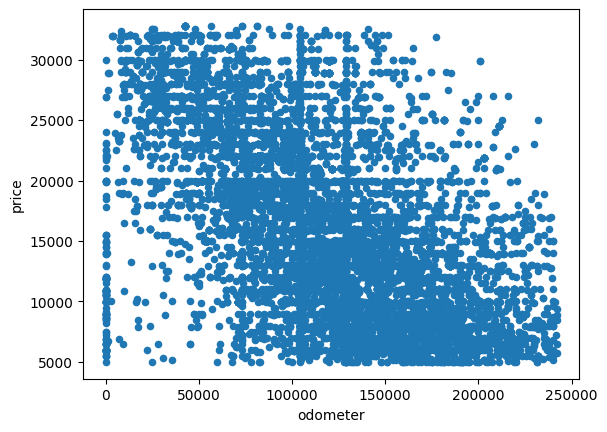

In [352]:
truck_query.plot(x='odometer', y='price', kind='scatter') 

- the price for truck is not affected by the early odometer
- regardless of odometer value the price of truck price range is random

#### Truck price factors `transmission` <a id='truck_transmission'></a>

In [353]:
truck_query['transmission'].value_counts()

transmission
automatic    8444
manual        260
other          67
Name: count, dtype: int64

- automatic transsmission is the most popular
- using median or mode will skew the reading because the gap between automatic and manual is huge

In [354]:
truck_query[truck_query['transmission'] == 'manual'].sort_values(by = 'price', ascending = False).head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id,brand,cylinders_other,condition_other
19639,31000,2017.0,chevrolet silverado 1500,excellent,8.0,gas,42400.0,manual,truck,white,True,2018-12-13,34,2018,2,21200.000000,3,chevrolet,8.0,excellent
5189,30995,2017.0,toyota tacoma,excellent,6.0,gas,30300.0,manual,truck,custom,True,2019-02-14,29,2019,3,10100.000000,3,toyota,6.0,excellent
13630,28950,2014.0,ram 2500,like new,6.0,diesel,159875.0,manual,truck,white,True,2019-03-09,9,2019,6,26645.833333,4,ram,6.0,like new
31647,28000,2012.0,ram 2500,excellent,6.0,diesel,101000.0,manual,truck,silver,True,2019-01-19,53,2019,8,12625.000000,3,ram,6.0,excellent
49726,27500,2005.0,ram 3500,excellent,6.0,diesel,102500.0,manual,truck,silver,True,2019-04-02,69,2019,15,6833.333333,3,ram,6.0,excellent


In [355]:
truck_query[truck_query['transmission'] == 'automatic'].sort_values(by = 'price', ascending = False).head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id,brand,cylinders_other,condition_other
7150,32785,2017.0,ford f-250 sd,good,8.0,gas,56748.0,automatic,truck,blue,True,2019-01-03,19,2019,3,18916.000000,2,ford,8.0,good
7677,32777,2012.0,chevrolet silverado 2500hd,excellent,8.0,diesel,81137.0,automatic,truck,unknown,True,2018-12-08,93,2018,7,11591.000000,3,chevrolet,8.0,excellent
10129,32777,2012.0,chevrolet silverado 2500hd,excellent,8.0,diesel,81137.0,automatic,truck,silver,True,2018-05-03,2,2018,7,11591.000000,3,chevrolet,8.0,excellent
24916,32750,2017.0,ford f250 super duty,like new,8.0,gas,42631.0,automatic,truck,white,True,2018-12-28,27,2018,2,21315.500000,4,ford,8.0,like new
30448,32750,2017.0,ford f250 super duty,like new,8.0,gas,42631.0,automatic,truck,white,True,2019-02-03,18,2019,3,14210.333333,4,ford,8.0,like new


In [356]:
# Create the boxplot of price with reference to brand
# https://www.youtube.com/watch?v=T-ubh8EWpTg

truck_transmission_price = truck_query.filter(['price','transmission'], axis=1)

<Axes: xlabel='price', ylabel='transmission'>

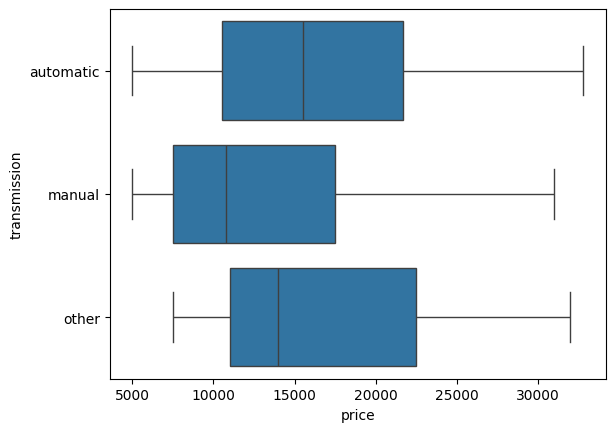

In [357]:
sns.boxplot(data = truck_transmission_price, y='transmission', x='price')

- automatic and other transmission has similar Q1 and Q3 
- while automatic is more popular than manual, automatic has the more consistent price gap between trucks
- the price for automatic is concentrated above 25000
- automatic, manual or other it does not affect much of the price, however if looking for a manual truck, a lot of them have high price
- if wanted to buy automatic the price has more range

#### Truck price factors `condition` <a id='truck_condition'></a>

In [358]:
truck_query['condition'].value_counts()

condition
excellent    4113
good         3825
like new      715
fair          102
new            12
salvage         4
Name: count, dtype: int64

In [359]:
truck_query.pivot_table(
    index = 'condition',
    values = 'price',
    aggfunc = 'median').sort_values(by = 'price', ascending = False)

,price
condition,
new,22335.5
like new,20995.0
excellent,15998.0
good,13990.0
salvage,9250.0
fair,6500.0


- a lot of the truck with a higher price is new or like new
- this is consistent with the analysis the price depency of vehicle age and model year
- eventhough the median for salvage and fair is skew, the counts and median reflect each other so it accepted

#### Truck price factors `paint_color` <a id='truck_paint'></a>

In [360]:
# Create the boxplot of price with reference to brand
# https://www.youtube.com/watch?v=T-ubh8EWpTg

truck_paint_price = truck_query.filter(['price','paint_color'], axis=1)

<Axes: xlabel='price', ylabel='paint_color'>

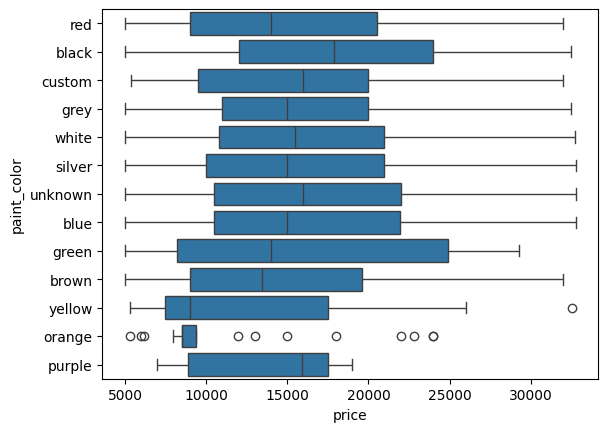

In [361]:
sns.boxplot(data = truck_paint_price, y='paint_color', x='price')

In [362]:
truck_paint = truck_query.pivot_table(
    index = 'paint_color',
    values = 'price',
    aggfunc = 'count').sort_values(by = 'price', ascending = False)
truck_paint

,price
paint_color,
white,2599
unknown,1532
black,1064
silver,779
red,765
grey,690
blue,686
custom,240
green,178


- unknown is the 2nd most popular color paint
- monochrome colors are popular, followed by red and blue
- price is not a good comparison because the amount of orange, yellow, purple colored car is miniscule compare to unknown

<Axes: ylabel='price'>

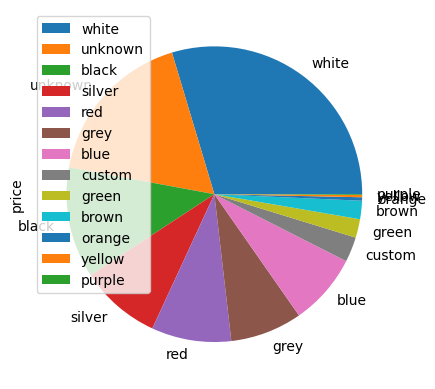

In [363]:
truck_paint.sort_values(by = 'price', ascending = False).plot(kind = 'pie', y='price')

- orange, yellow, purple, green, brown, custom all turn to other

In [364]:
truck_query['paint_other'] = truck_query['paint_color'].where(~truck_query['paint_color'].isin(['orange','yellow','purple','green','brown','custom']),'others')

C:\Users\user\AppData\Local\Temp\ipykernel_17652\1328662462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truck_query['paint_other'] = truck_query['paint_color'].where(~truck_query['paint_color'].isin(['orange','yellow','purple','green','brown','custom']),'others')


In [365]:
truck_paint = truck_query.pivot_table(
    index = 'paint_other',
    values = 'price',
    aggfunc = 'count').sort_values(by = 'price', ascending = False)
truck_paint

,price
paint_other,
white,2599
unknown,1532
black,1064
silver,779
red,765
grey,690
blue,686
others,656


<Axes: ylabel='price'>

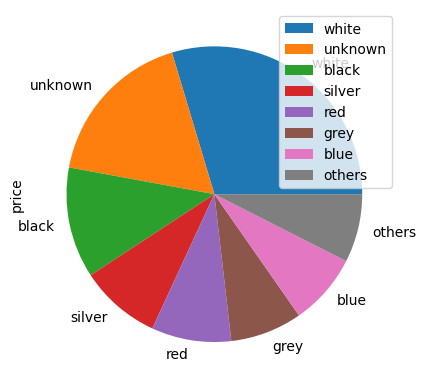

In [366]:
truck_paint.sort_values(by = 'price', ascending = False).plot(kind = 'pie', y='price')

In [367]:
truck_query.pivot_table(
    index = 'paint_other',
    values = 'price',
    aggfunc = 'median').sort_values(by = 'price', ascending = False)

,price
paint_other,
black,17900.0
unknown,15990.5
white,15495.0
blue,14995.0
grey,14995.0
silver,14988.0
red,13995.0
others,13972.5


- black paint truck has the highest median price followed by white, which are also monochrome colors
- blue paint truck has higher price than red paint

### Price factors for only SUV <a id='price_suv'></a>

In [368]:
suv_query = car_drop_outlier.query('type == "SUV"')
suv_query

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id,brand,cylinders_other,condition_other
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknown,True,2018-06-23,19,2018,8,18125.000000,2,bmw,6.0,good
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2019,7,15639.000000,3,honda,6.0,excellent
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,unknown,True,2018-07-16,19,2018,7,14882.000000,3,kia,4.0,excellent
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,2019,12,12265.916667,3,honda,6.0,excellent
14,12990,2009.0,gmc yukon,excellent,8.0,gas,132285.0,automatic,SUV,black,True,2019-01-31,24,2019,11,12025.909091,3,gmc,8.0,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51494,7999,2009.0,chevrolet equinox,excellent,6.0,gas,95021.0,automatic,SUV,silver,True,2019-01-03,8,2019,11,8638.272727,3,chevrolet,6.0,excellent
51495,9500,2012.0,chevrolet traverse,good,6.0,gas,144500.0,automatic,SUV,unknown,True,2019-03-05,1,2019,8,18062.500000,2,chevrolet,6.0,good
51500,6995,2012.0,buick enclave,excellent,6.0,gas,157000.0,automatic,SUV,white,True,2018-08-04,17,2018,7,22428.571429,3,buick,6.0,excellent
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,unknown,False,2019-04-01,175,2019,9,12343.111111,4,chevrolet,4.0,like new


In [369]:
# suv_query.corr()['price']
suv_query.select_dtypes(include=['number']).corr()

,price,model_year,cylinders,odometer,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id
price,1.000000,0.505681,0.100250,-0.541772,-0.018038,0.015085,-0.503660,0.120975,0.217389
model_year,0.505681,1.000000,-0.282967,-0.466219,-0.009602,0.042739,-0.994670,0.485058,0.160974
cylinders,0.100250,-0.282967,1.000000,0.261890,0.012517,-0.019671,0.280677,-0.073479,-0.056755
odometer,-0.541772,-0.466219,0.261890,1.000000,0.015814,-0.016275,0.464111,0.341136,-0.268330
days_listed,-0.018038,-0.009602,0.012517,0.015814,1.000000,-0.002721,0.009312,0.000468,-0.005441
date_posted_year,0.015085,0.042739,-0.019671,-0.016275,-0.002721,1.000000,0.060504,-0.124057,0.003909
vehicle_age,-0.503660,-0.994670,0.280677,0.464111,0.009312,0.060504,1.000000,-0.497415,-0.160423
avg_mileage,0.120975,0.485058,-0.073479,0.341136,0.000468,-0.124057,-0.497415,1.000000,-0.072400
condition_id,0.217389,0.160974,-0.056755,-0.268330,-0.005441,0.003909,-0.160423,-0.072400,1.000000


- similar to sedan the closest correlation with `price` for SUV type are `model_year`, `odometer`, and `vehicle_age`

#### SUV price factors `vehicle_age` <a id='suv_age'></a>

In [370]:
suv_query['vehicle_age'].value_counts()

vehicle_age
8      892
7      794
6      764
9      748
12     693
11     688
5      683
10     639
4      525
3      355
13     342
2      252
15     201
14     192
16     138
1      111
17      76
19      47
18      38
20      33
21      28
22      24
23      15
25       8
29       6
31       6
30       6
26       5
24       5
27       3
32       2
33       2
111      2
28       2
36       1
34       1
42       1
35       1
Name: count, dtype: int64

- the age of the SUV is much more scatter but the when it reaches 17 years it does not have much add
- drop SUV with vehicle age > 16

In [371]:
suv_query.query('vehicle_age > 16')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id,brand,cylinders_other,condition_other
327,9700,2000.0,toyota 4runner,excellent,6.0,gas,200116.0,automatic,SUV,unknown,True,2018-11-10,17,2018,19,10532.421053,3,toyota,6.0,excellent
349,5999,2002.0,bmw x5,excellent,6.0,gas,153000.0,automatic,SUV,white,True,2018-05-23,82,2018,17,9000.000000,3,bmw,6.0,excellent
466,5000,2000.0,chevrolet tahoe,good,8.0,gas,129000.0,automatic,SUV,silver,True,2018-11-20,20,2018,19,6789.473684,2,chevrolet,8.0,good
569,7900,2001.0,jeep wrangler,excellent,4.0,gas,231089.0,manual,SUV,yellow,True,2018-11-28,128,2018,18,12838.277778,3,jeep,4.0,excellent
578,6500,1998.0,jeep wrangler,excellent,4.0,gas,94000.0,automatic,SUV,white,True,2018-07-03,20,2018,21,4476.190476,3,jeep,4.0,excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50965,7900,2001.0,jeep wrangler,excellent,4.0,gas,231089.0,manual,SUV,yellow,True,2018-08-15,44,2018,18,12838.277778,3,jeep,4.0,excellent
50995,7300,1999.0,toyota 4runner,good,4.0,gas,129000.0,automatic,SUV,unknown,True,2018-07-26,31,2018,20,6450.000000,2,toyota,4.0,good
51014,7000,1990.0,jeep wrangler,good,6.0,gas,131000.0,manual,SUV,red,True,2018-12-06,49,2018,29,4517.241379,2,jeep,6.0,good
51155,6000,2002.0,chevrolet suburban,excellent,8.0,gas,140000.0,automatic,SUV,unknown,True,2018-05-07,15,2018,17,8235.294118,3,chevrolet,8.0,excellent


In [372]:
# Drop rows that vehicle age is older than 16
suv_age_query = suv_query.drop(suv_query[suv_query['vehicle_age'] > 16].index)

In [373]:
suv_age_query['vehicle_age'].value_counts()

vehicle_age
8     892
7     794
6     764
9     748
12    693
11    688
5     683
10    639
4     525
3     355
13    342
2     252
15    201
14    192
16    138
1     111
Name: count, dtype: int64

In [374]:
# find the median price

suv_age_query.pivot_table(
    index = 'vehicle_age',
    values = 'price',
    aggfunc = 'median')

,price
vehicle_age,
1,21695.0
2,20828.5
3,18800.0
4,17495.0
5,15425.0
6,12992.5
7,11695.0
8,10500.0
9,9250.0


- similar to truck the older the SUV the lower the price

#### SUV price factors `model_year` <a id='suv_year'></a>

In [375]:
suv_year_query= suv_query.pivot_table(
    index = 'model_year',
    values = 'condition',
    aggfunc = 'count')
suv_year_query.sort_values(by = 'condition', ascending = False)

,condition
model_year,
2011.0,902
2012.0,814
2013.0,803
2008.0,725
2010.0,717
2014.0,662
2007.0,655
2015.0,603
2009.0,592


- the oldest SUV is from the year 1908
- the year with the most adds from between 2004 to 2018
- drop SUV that has lessm than 120 adds

In [376]:
# Drop rows that model_year is less than 2005
suv_year_query = suv_year_query.drop(suv_year_query[suv_year_query['condition'] < 120].index)

In [377]:
# Combine suv_year_query with suv_query
suv_year_query = suv_year_query.merge(right = suv_query, on = 'model_year', how = 'inner')
suv_year_query

,model_year,condition_x,price,model,condition_y,cylinders,fuel,odometer,transmission,type,...,is_4wd,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id,brand,cylinders_other,condition_other
0,2004.0,188,7500,jeep wrangler,good,6.0,gas,129000.0,automatic,SUV,...,True,2018-05-17,39,2018,15,8600.000000,2,jeep,6.0,good
1,2004.0,188,5500,ford explorer,good,6.0,gas,140355.0,automatic,SUV,...,True,2018-09-10,35,2018,15,9357.000000,2,ford,6.0,good
2,2004.0,188,6995,ford expedition,excellent,8.0,gas,92546.0,automatic,SUV,...,True,2018-05-23,18,2018,15,6169.733333,3,ford,8.0,excellent
3,2004.0,188,5995,bmw x5,excellent,6.0,gas,104230.0,automatic,SUV,...,True,2018-12-08,13,2018,15,6948.666667,3,bmw,6.0,excellent
4,2004.0,188,5890,chevrolet suburban,good,8.0,gas,136801.0,automatic,SUV,...,False,2018-11-01,59,2018,15,9120.066667,2,chevrolet,8.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7917,2018.0,141,20038,jeep cherokee,excellent,4.0,gas,14880.0,automatic,SUV,...,True,2018-10-17,24,2018,1,14880.000000,3,jeep,4.0,excellent
7918,2018.0,141,22692,jeep cherokee,excellent,6.0,gas,21927.0,automatic,SUV,...,True,2018-09-08,112,2018,1,21927.000000,3,jeep,6.0,excellent
7919,2018.0,141,16950,subaru forester,excellent,4.0,gas,17000.0,automatic,SUV,...,True,2019-01-28,18,2019,2,8500.000000,3,subaru,4.0,excellent
7920,2018.0,141,21900,chevrolet traverse,excellent,6.0,gas,51000.0,automatic,SUV,...,False,2019-03-08,51,2019,2,25500.000000,3,chevrolet,6.0,excellent


In [378]:
# find the median price

suv_year_query.pivot_table(
    index = 'model_year',
    values = 'price',
    aggfunc = 'median').sort_values(by = 'price', ascending = False)

,price
model_year,
2018.0,20998.0
2017.0,20927.5
2016.0,17125.0
2015.0,17000.0
2014.0,14547.5
2013.0,12750.0
2012.0,10995.0
2011.0,10097.0
2010.0,8869.0


- similar to price of the truck, as it grows older it the price will also become decreases

#### SUV price factors `odometer` <a id='suv_odometer'></a>

<Axes: xlabel='odometer', ylabel='price'>

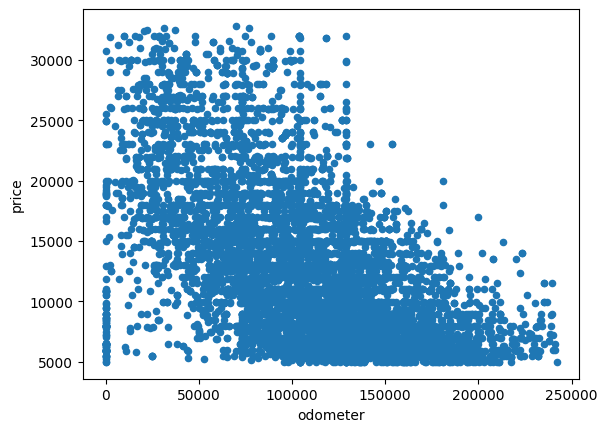

In [379]:
suv_query.plot(x='odometer', y='price', kind='scatter') 

- the SUV while decrease value after it's driven, the price is still stable before it reaches 125000km
- by the time the odometer of SUV reach 125000km it lowers the price

#### SUV price factors `transmission` <a id='suv_transmission'></a>

In [380]:
suv_query['transmission'].value_counts()

transmission
automatic    7856
manual        393
other          80
Name: count, dtype: int64

In [381]:
suv_query[suv_query['transmission'] == 'manual'].sort_values(by = 'price', ascending = False).head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id,brand,cylinders_other,condition_other
5286,31500,2008.0,jeep wrangler,like new,6.0,gas,12500.0,manual,SUV,custom,True,2018-06-09,17,2018,11,1136.363636,4,jeep,6.0,like new
45784,31000,2015.0,chevrolet tahoe,good,8.0,gas,87300.0,manual,SUV,white,True,2018-11-05,24,2018,4,21825.000000,2,chevrolet,8.0,good
37161,30500,2015.0,toyota highlander,excellent,6.0,gas,55000.0,manual,SUV,white,True,2018-07-15,33,2018,4,13750.000000,3,toyota,6.0,excellent
41640,28988,2012.0,jeep wrangler,like new,6.0,gas,48393.0,manual,SUV,white,True,2019-02-23,43,2019,8,6049.125000,4,jeep,6.0,like new
46334,28988,2012.0,jeep wrangler,like new,6.0,gas,48393.0,manual,SUV,white,True,2018-07-06,46,2018,7,6913.285714,4,jeep,6.0,like new


In [382]:
suv_query[suv_query['transmission'] == 'automatic'].sort_values(by = 'price', ascending = False).head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_year,vehicle_age,avg_mileage,condition_id,brand,cylinders_other,condition_other
34152,32800,2015.0,chevrolet tahoe,excellent,6.0,gas,69980.0,automatic,SUV,unknown,True,2018-07-23,37,2018,4,17495.000000,3,chevrolet,6.0,excellent
38805,32598,2017.0,toyota highlander,excellent,6.0,gas,31162.0,automatic,SUV,white,True,2019-03-14,31,2019,3,10387.333333,3,toyota,6.0,excellent
8012,32595,2015.0,cadillac escalade,like new,8.0,gas,77000.0,automatic,SUV,white,True,2018-12-01,15,2018,4,19250.000000,4,cadillac,8.0,like new
43106,32500,2014.0,jeep wrangler,like new,4.0,gas,22000.0,automatic,SUV,silver,True,2019-02-19,36,2019,6,3666.666667,4,jeep,4.0,like new
5355,32500,2017.0,toyota 4runner,like new,6.0,gas,37353.0,automatic,SUV,black,True,2018-08-25,47,2018,2,18676.500000,4,toyota,6.0,like new


In [383]:
# Create the boxplot of price with reference to brand
# https://www.youtube.com/watch?v=T-ubh8EWpTg

suv_transmission_price = suv_query.filter(['price','transmission'], axis=1)

<Axes: xlabel='price', ylabel='transmission'>

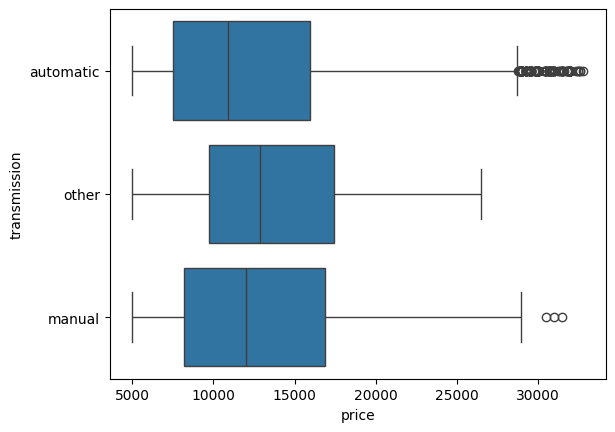

In [384]:
sns.boxplot(data = suv_transmission_price, y='transmission', x='price')

- the SUV with automatic transmission is more popular than manual or others
- the price for automatic is mostly concentrated above 25000 price
- while manual price is more space between each SUV

#### SUV price factors `condition` <a id='suv_condition'></a>

In [385]:
suv_query['condition'].value_counts()

condition
excellent    4819
good         2660
like new      808
fair           28
new            12
salvage         2
Name: count, dtype: int64

In [386]:
suv_query.pivot_table(
    index = 'condition_other',
    values = 'price',
    aggfunc = 'median').sort_values(by = 'price', ascending = False)

,price
condition_other,
like new,14995
excellent,11480
good,8999
others,6995


- using the column `condition` that has the value fair, salvage and new the reading average will be skewed 
- using the `condition_other` column shows a more accurate reading
- similar to the age, customers wanted a new vehicle regardless of truck or SUV

#### SUV price factors `paint_color` <a id='suv_paint'></a>

In [387]:
suv_paint = suv_query.pivot_table(
    index = 'paint_color',
    values = 'price',
    aggfunc = 'count').sort_values(by = 'price', ascending = False)
suv_paint

,price
paint_color,
black,1571
unknown,1510
white,1371
silver,1069
grey,784
blue,658
red,573
green,238
brown,225


<Axes: ylabel='price'>

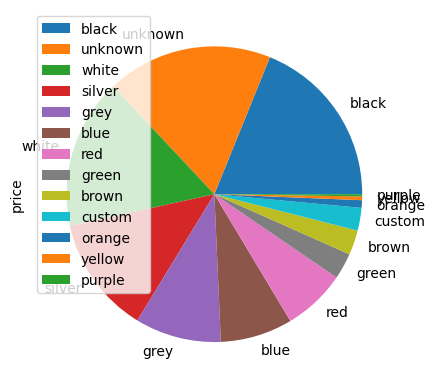

In [388]:
suv_paint.sort_values(by = 'price', ascending = False).plot(kind = 'pie', y='price')

- monochrome color, black, white, silver, grey have the most adds
- change the purple, yellow, orange, custom, green, and brown to others

In [389]:
suv_query['paint_color'] = suv_query['paint_color'].where(~suv_query['paint_color'].isin(['orange','yellow','purple','green','brown','custom']),'others')

C:\Users\user\AppData\Local\Temp\ipykernel_17652\3829042421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suv_query['paint_color'] = suv_query['paint_color'].where(~suv_query['paint_color'].isin(['orange','yellow','purple','green','brown','custom']),'others')


In [390]:
suv_paint = suv_query.pivot_table(
    index = 'paint_color',
    values = 'price',
    aggfunc = 'median').sort_values(by = 'price', ascending = False)
suv_paint

,price
paint_color,
black,12750
white,11000
red,10995
others,10900
unknown,10825
grey,10500
silver,10250
blue,8650


<Axes: ylabel='price'>

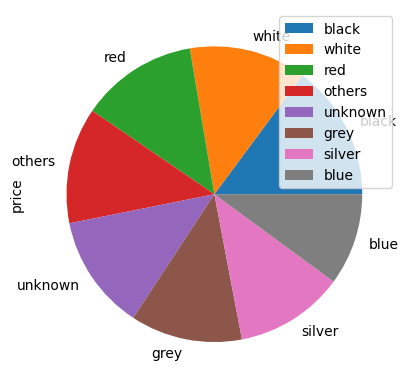

In [391]:
suv_paint.sort_values(by = 'price', ascending = False).plot(kind = 'pie', y='price')

## General conclusion <a id='conclusion'></a>

- For both truck and SUV the vehicle's age plays a factor on the price, the older the vehicle the lower the pice
- For both truck and SUV also the price is higher for the newer model, if it's a new release, then it's a higher price
- Similarly the condition for both vehicles affect the price
- The odomoter affects the price of the truck, but for the SUV, the odometer affected the price. The price remain stagnant at early odometer but upon reaching 130000KM or more it decreases on price
- The monochrome, black and white color for both truck and SUV has the most median price, followed by blue and then red
- The transmission for sedan regardless of automatic or manual does not affect the price, but the median pricing for the manual SUV is higher than median automatic SUV